# *E-Commerce Customer churn*

Kenzi Lamberto

## *1. Understanding Business Problem*



### *Context*

Churn rate adalah tingkat atau persentase pelanggan memutus hubungan dengan sebuah bisnis atau perusahaan pada periode tertentu. Alasan utama mengapa customer churn rate penting adalah persentase pelanggan yang hilang tersebut sangat memengaruhi growth rate perusahaan
[Glints](https://glints.com/id/lowongan/churn-rate-adalah/).

Dalam konteks retensi pelanggan, customer churn adalah isu kritis yang harus diatasi oleh perusahaan. Hal ini dikarenakan peningkatan retensi pelanggan dapat memberikan dampak signifikan terhadap profitabilitas. Misalnya, sebuah riset menunjukkan bahwa peningkatan retensi pelanggan sebesar 5% dapat meningkatkan laba hingga 25% [Bain](https://media.bain.com/Images/BB_Prescription_cutting_costs.pdf).

Dengan memahami dan menerapkan strategi untuk mengurangi churn, perusahaan tidak hanya dapat meningkatkan retensi tetapi juga menciptakan hubungan yang lebih kuat dengan pelanggan, yang pada gilirannya mendukung keberlanjutan dan pertumbuhan bisnis.

Dataset yang akan dibahas hari ini merupakan milik sebuah perusahaan e-commerce online terkemuka. Perusahaan ini ingin mengetahui pelanggan seperti apa yang akan berhenti/churn, sehingga mereka dapat untuk menawarkan promo kepada pelanggan yang lebih tepat dan menjaga retensi pelanggan.

### *Problem Statement and Goals*

Sebelum menawarkan promo, perusahaan perlu merancang strategi agar promo tepat sasaran. Promo tentunya tidak diberikan kepada semua pelanggan, namun diprioritaskan untuk mereka yang diperkirakan akan churn. Langkah ini bertujuan untuk efisiensi dalam pengeluaran promo. Jika perusahaan keliru dalam memberikan promo atau memberikan promo secara sembarangan kepada pelanggan yang tidak diprediksi akan churn, hal ini dapat menyebabkan kerugian operasional akibat pengeluaran biaya untuk promo yang sebenarnya tidak perlu.

Goals dari perusahaan ialah memprediksi pelanggan seperti apa yang sangat mungkin akan churn, agar dapat memfokuskan penawaran promo kepada mereka. Perusahaan juga ingin mengidentifikasi faktor-faktor atau variabel yang mempengaruhi keputusan pelanggan untuk churn agar dapat merancang rencana yang lebih efektif untuk meningkatkan loyalitas pelanggan.

### *Analytic Approach*

Bangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas pelanggan akan churn atau tidak, tentunya berdasarkan analisis data untuk menemukan pola yang membedakan pelanggan yang akan churn atau tidak.



### *Metric Evaluation*

Dalam melakukan prediksi, kesalahan yang dapat terjadi yaitu:

**Type 1 error** : False Positive  
Konsekuensi: kerugian perusahaan karena mengeluarkan biaya promo untuk pelanggan yang tidak tepat.

**Type 2 error** : False Negative  
Konsekuensi: kerugian perusahaan karena customer berhenti/*churn*.

**Target**:   
0 : Pelanggan tidak *churn*  
1 : Pelanggan *churn*

**Evaluation**:
Evaluation yang digunakan ialah Sensitivity, Accuracy, F2 Score.

![Confussion Matrix](https://dearpandemic.org/wp-content/uploads/2022/05/Sarah-1.png)

- **True Positive (TP)**: Customer diprediksi *churn* dan TERJADI *churn*
- **False Positive (FP)**: Customer diprediksi *churn*, namun ternyata TIDAK *churn*
- **False Negative (FN)**: Customer diprediksi tidak *churn*, namun ternyata TERJADI *churn*
- **True Negative (TN)**: Customer diprediksi tidak *churn* dan kenyataannya TIDAK *churn*
- **Sensitivity or Recall**: TP / (TP + FN)
- **Accuracy**: (TP + TN) / (TP + TN + FP + FN)
- **F2 Score**: (1 + 2^2) * (Specificity * Sensitivity) / (2^2 * Specificity + Sensitivity)

Menurut [Singh et al. (2024)](https://www.sciencedirect.com/science/article/pii/S2666764923000401), kombinasi antara sensitivity dan accuracy adalah matriks evaluasi yang paling cocok untuk konteks custome churn.

Mempertahankan Pelanggan akan sangat diperhatikan dalam kasus ini (*False Negative*) karena dapat berakibat buruk terhadap keberlangsungan perusahaan. Namun, jika kita tetap ingin melihat evaluasi dari (*False Positive*), sehingga digunakan juga F2 Score.




### Python Libraries

In [ ]:
# Needed
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display
import matplotlib.patches as mpatches

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
!pip install category_encoders
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, RFECV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler, KBinsDiscretizer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, make_scorer, roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Imbalance Dataset
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, KMeansSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN,SMOTETomek

# Shap
!pip install shap
import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Saving Model
import pickle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.4 MB/s eta 0:00:00


## *2. Data Understanding*




### *Dataset*

Source: [dari Purwadhika](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves)

Setiap baris data merepresentasikan informasi seorang pelanggan yang ada dalam database perusahaan.

In [ ]:
# Load Dataset
df_original = pd.read_csv(r'data_ecommerce_customer_churn.csv')
df = df_original.copy()

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| Tenure | Numerik | Masa pengguna berlangganan pada layanan |
| WarehouseToHome | Numerik | Jarak antara gudang dan rumah pengguna |
| NumberOfDeviceRegistered | Numerik | Jumlah perangkat yang diregistrasikan terhadap satu pengguna/akun |
| PreferedOrderCat | Numerik bersifat Kategorik | Kategori yang sering dipesan dalam satu bulan terakhir |
| SatisfactionScore | Numerik bersifat Kategorik Ordinal | Nilai kepuasan pelanggan terhadap pelayanan |
| MaritalStatus | Numerik bersifat Kategorik Nominal | Status pernikahan pelanggan |
| NumberOfAddress | Numerik | Jumlah alamat yang terdaftar dalam satu pengguna |
| Complaint | Numerik bersifat Kategorik Nominal| Penanda jika ada keluhaneluhan yang diajukan dalam satu bulan terakhir |
| DaySinceLastOrder | Numerik | Hari terakhir pemesanan yang dilakukan oleh pelanggan |
| CashbackAmount | Numerik | Rata-rata cashback dalam satu bulan terakhir |
| Churn | Numerik bersifat Kategorik Nominal| Identifikasi pengguna churn atau tidak. 1 untuk churn, 0 untuk tidak churn |

### *Understanding Variable Effects on Churn*

Semacam EDA, namun untuk saat ini hanya untuk melihat efek kolom-kolom lain terhadap variabel Churn karena sebagaimana diinformasikan pada ketentuan Capstone Module 3:


> Sebagai catatan tambahan, siswa tidak diwajibkan untuk menyertakan Exploratory Data
Analysis (EDA) pada file Jupyter Notebook. Namun, jika ingin menyertakan pun tidak menjadi
masalah, tetapi tidak masuk ke dalam poin penilaian.



#### *Continuous Variable*

<ipython-input-4-5986b2a6fd4d>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,a)


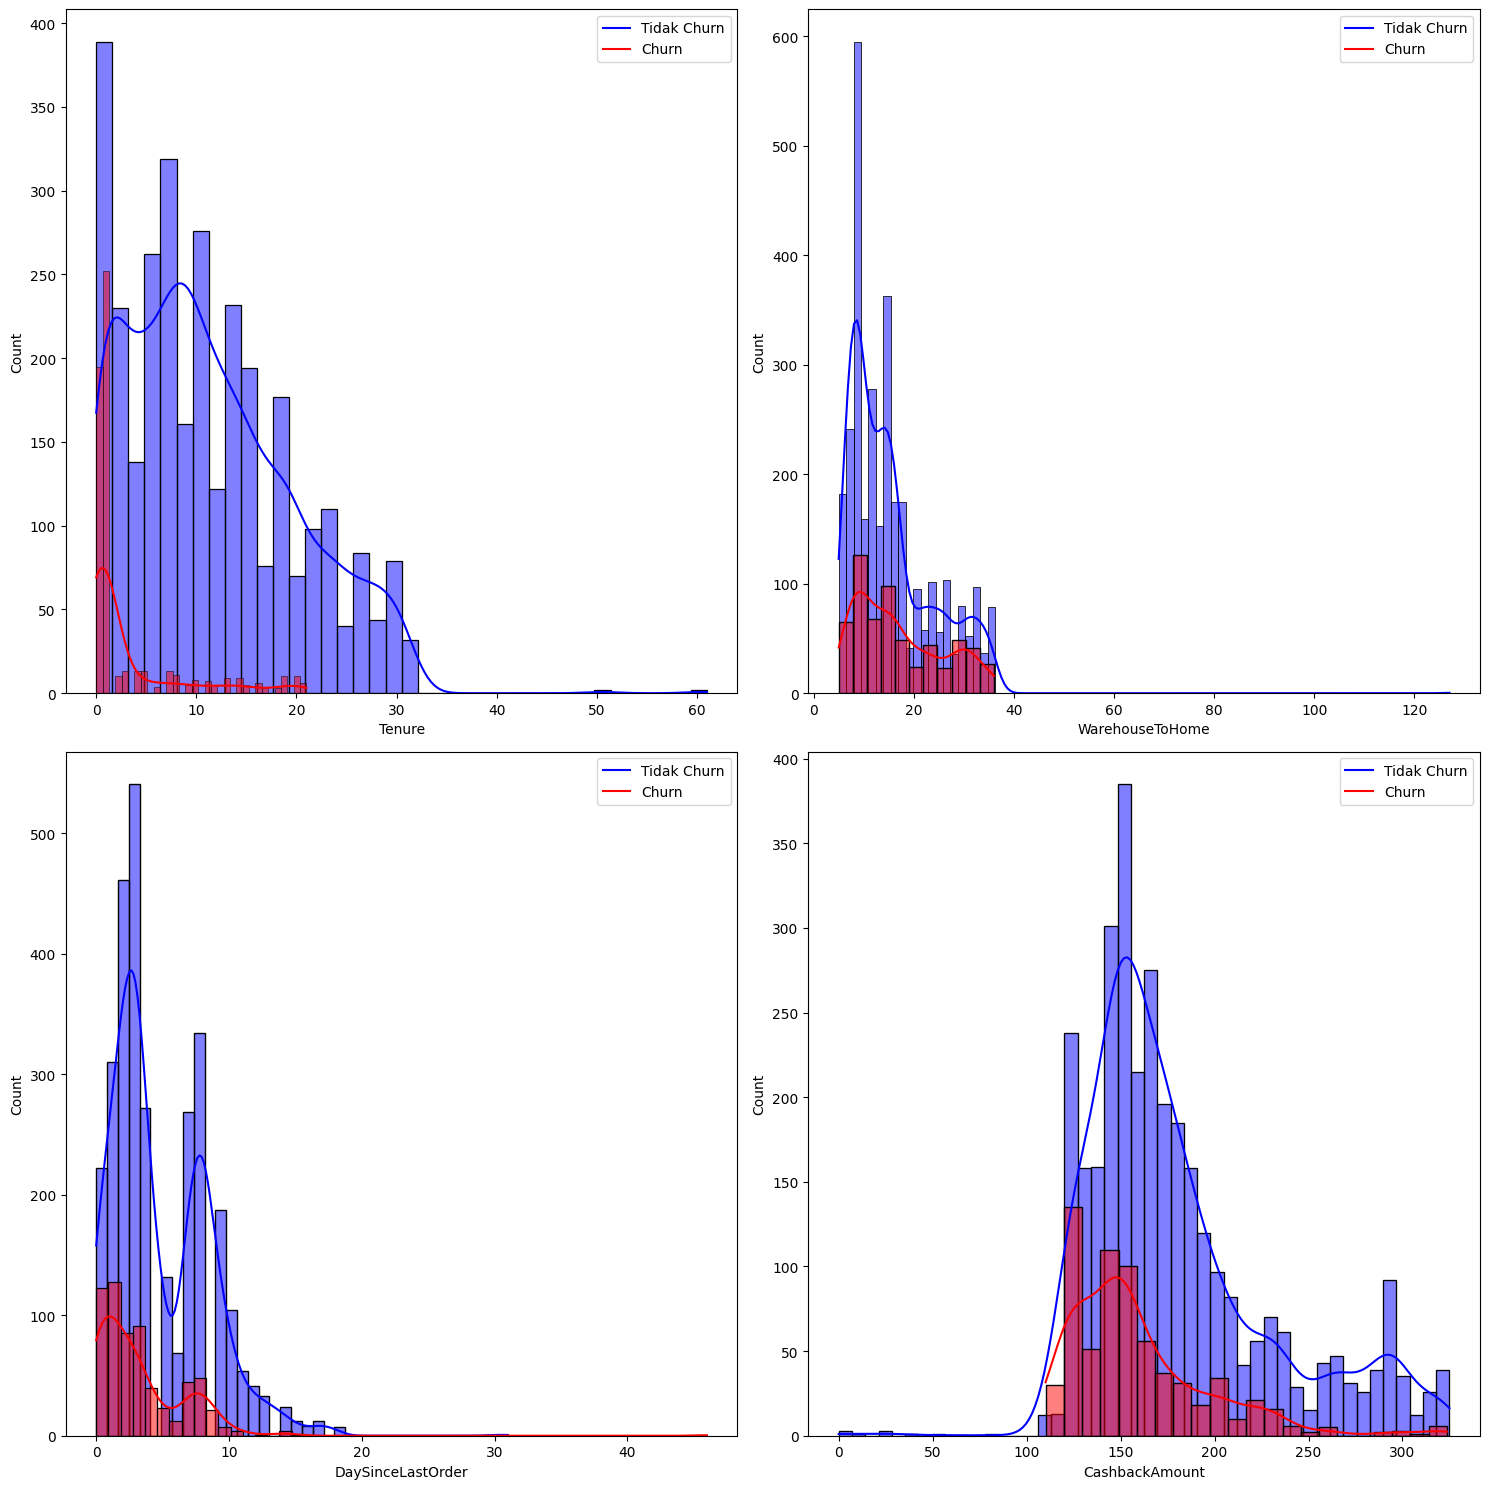

In [ ]:
# Distribusi pada kolom kontinu terhadap churn
continuous= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
a=1
sns.color_palette('pastel')

plt.figure(figsize=(15,15))
plt.title('Distribusi continuous columns terhadap churn', fontsize=20)
for i in continuous:
    plt.subplot(2,2,a)
    sns.histplot(x=df[df['Churn']==0][i],kde=True,color='blue')
    sns.histplot(x=df[df['Churn']==1][i],kde=True,color='red')
    plt.legend(labels=['Tidak Churn','Churn'])
    plt.tight_layout()
    a+=1

plt.show()

### *Data Cleaning and Analytics*

Bila ada data yang hilang/kosong dibeberapa fitur/kolom, kemudian fitur/kolom enrolle_id tidak berguna untuk analisis dan modeling, maka kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

#### *Data Cleaning*

##### *Missing Value Checking*

In [ ]:
list_info = []
for col in df.columns:
    list_info.append([col, df[col].dtype, len(df), df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
    df[col].nunique(), df[col].unique()])

df_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    '% Missing Value', '# Unique', 'Sample Data'],
    data = list_info)

df_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,% Missing Value,# Unique,Sample Data
0,NumberOfDeviceRegistered,int64,3941,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
1,SatisfactionScore,int64,3941,0,0.00,5,"[3, 1, 4, 2, 5]"
2,NumberOfAddress,int64,3941,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
3,Complain,int64,3941,0,0.00,2,"[0, 1]"
4,Churn,int64,3941,0,0.00,2,"[0, 1]"
5,Tenure,float64,3941,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
6,WarehouseToHome,float64,3941,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
7,DaySinceLastOrder,float64,3941,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
8,CashbackAmount,float64,3941,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."
9,PreferedOrderCat,object,3941,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."


Didapatkan informasi:

- Kolom `PreferedOrderCat` memiliki kategori *Mobile* dan *Mobile Phone* bermakna sama, yang akan digabungkan menjadi satu kategori.
- Kolom data numerik `Tenure`, `WarehouseToHome`, dan `DaySinceLastOrder` memiliki missing value bertipe **NaN** dengan masing - masing presentase ~5%. missing value tersebut akan ditangani pada preprocessing.
- Tipe data setiap kolom sesuai (termasuk kolom numerik yang bersifat kategorik, karena seolah-olah sudah dilakukan encoding) sehingga tidak perlu penyesuaian tipe data.

Penyamaan kategori ini gampangg sehingga dapat dilakukan langsung disini.

In [ ]:
# Penyamaan kategori di PreferedOrderCat
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

In [ ]:
# Missing value
print(f'''Amount row with missing value(s): {df[df.isna().any(axis=1)].shape[0]}
Persentase row with missing value(s): {round(df.isna().sum().sum()/df.shape[0]*100,2)}%''')

Amount row with missing value(s): 576
Persentase row with missing value(s): 14.62%


Jumlah missing value cukup banyak di 14.62%. Missing value akan dianalisa lebih lanjut sebelum pemilihan metode handling missing value.

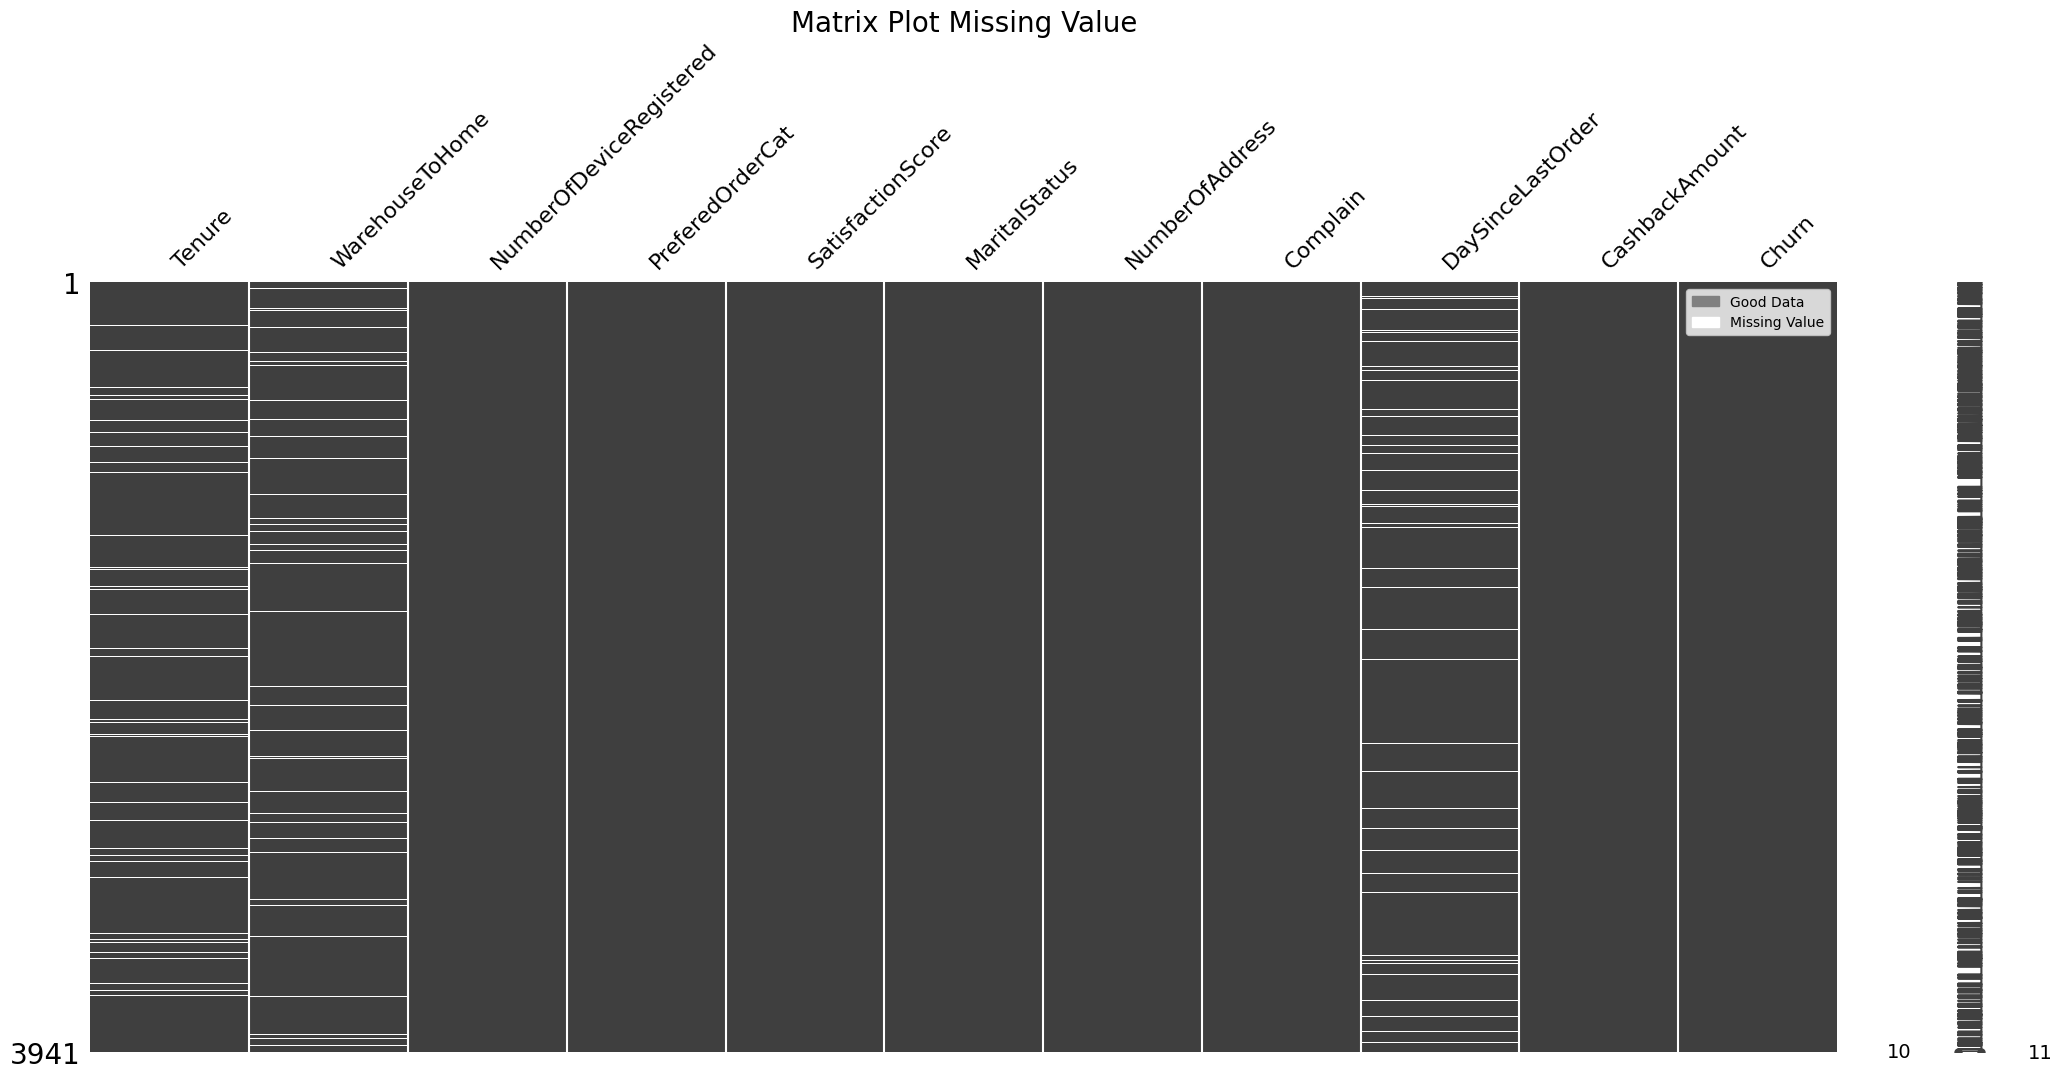

In [ ]:
# Cek missing value with msno
msno.matrix(df)
gray_patch = mpatches.Patch(color='gray', label='Good Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()

Missing value tidak menunjukkan pola tertentu. Kita coba sort data berdasarkan variabel tertentu yang mungkin dapat menunjukkan suatu pola. Variabel yang sepertinya mungkin dapat berpengaruh antara lain `SatisfactionScore` dan `CashbackAmount` yang berhubungan langsung pada kegiatan suatu transaksi.

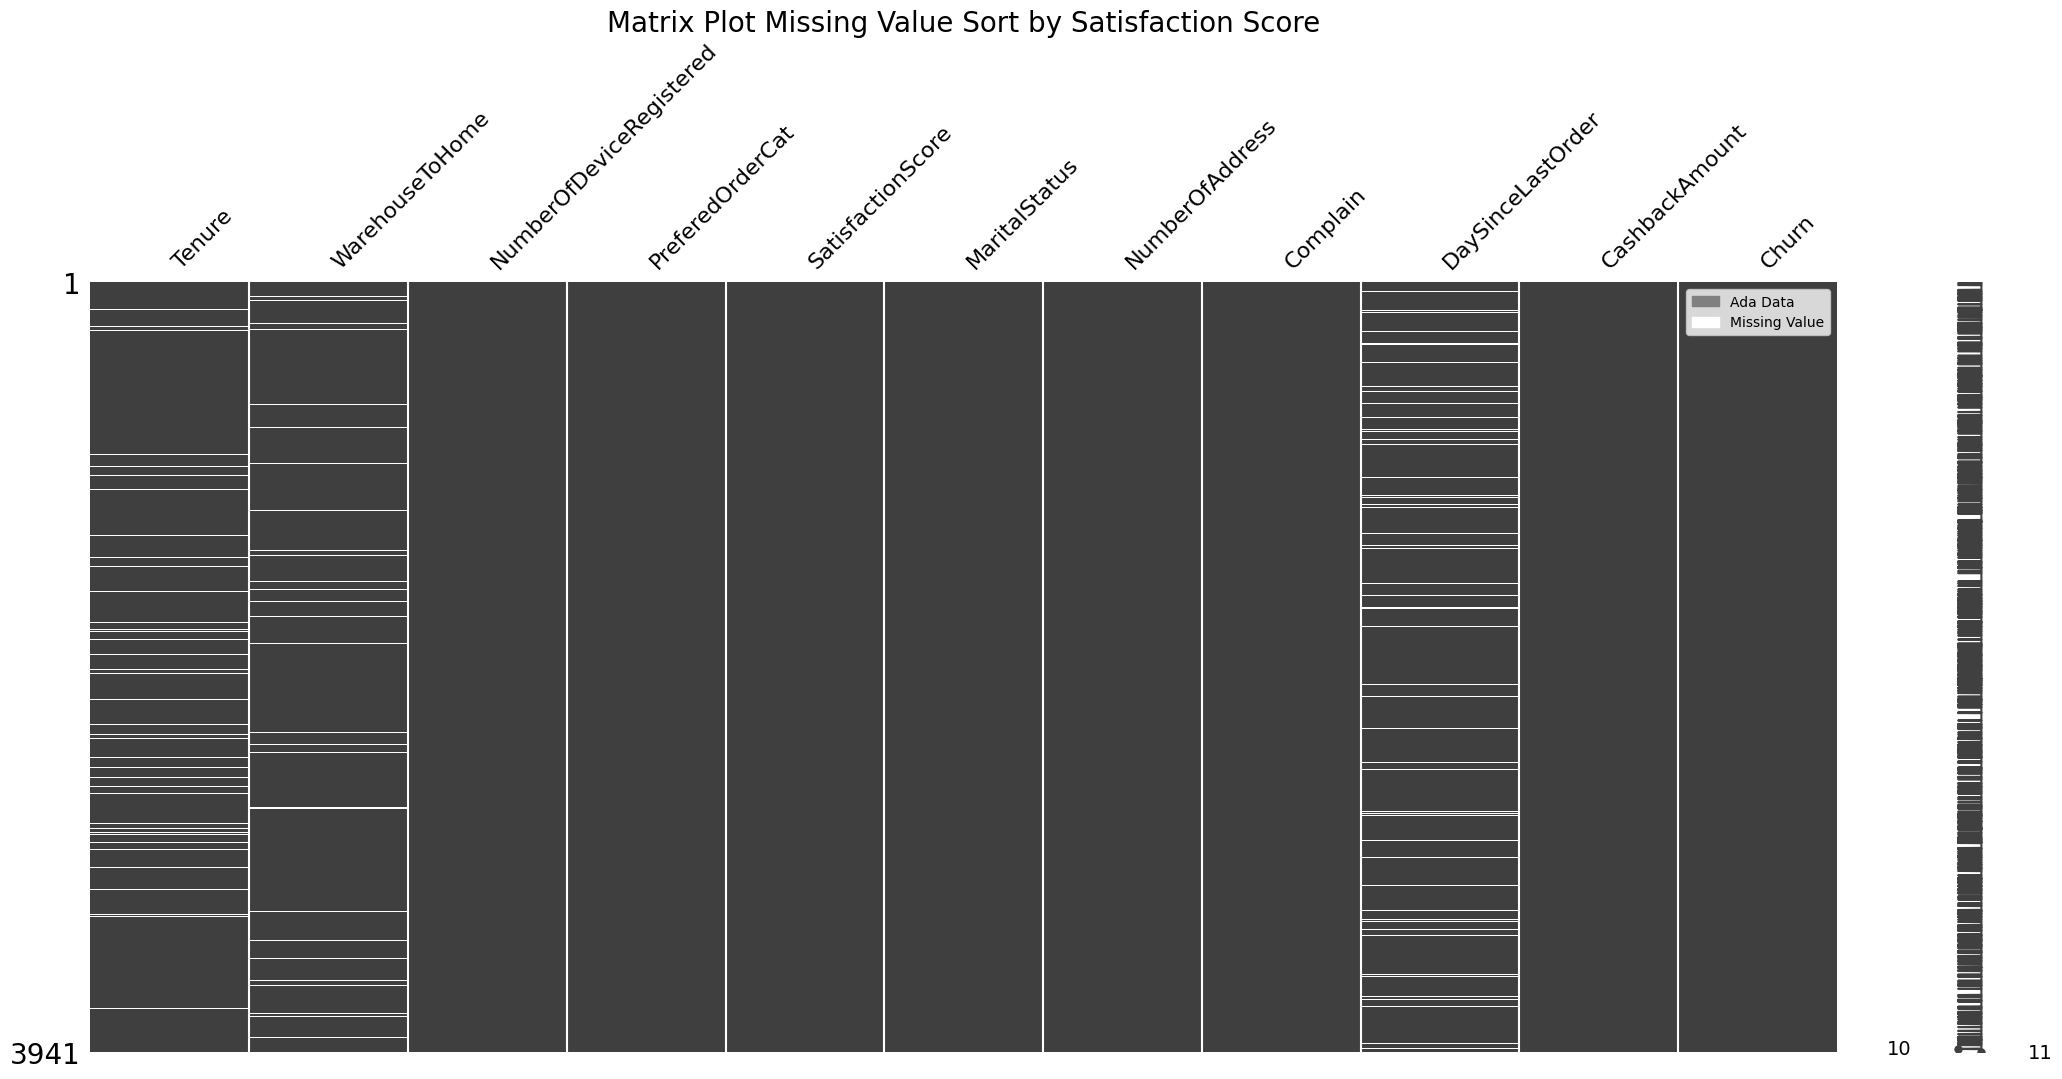

In [ ]:
# Matrix missingness sorted by satisfaction score
msno.matrix(df.sort_values(by=['SatisfactionScore'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort by Satisfaction Score', fontsize=20)
plt.show()

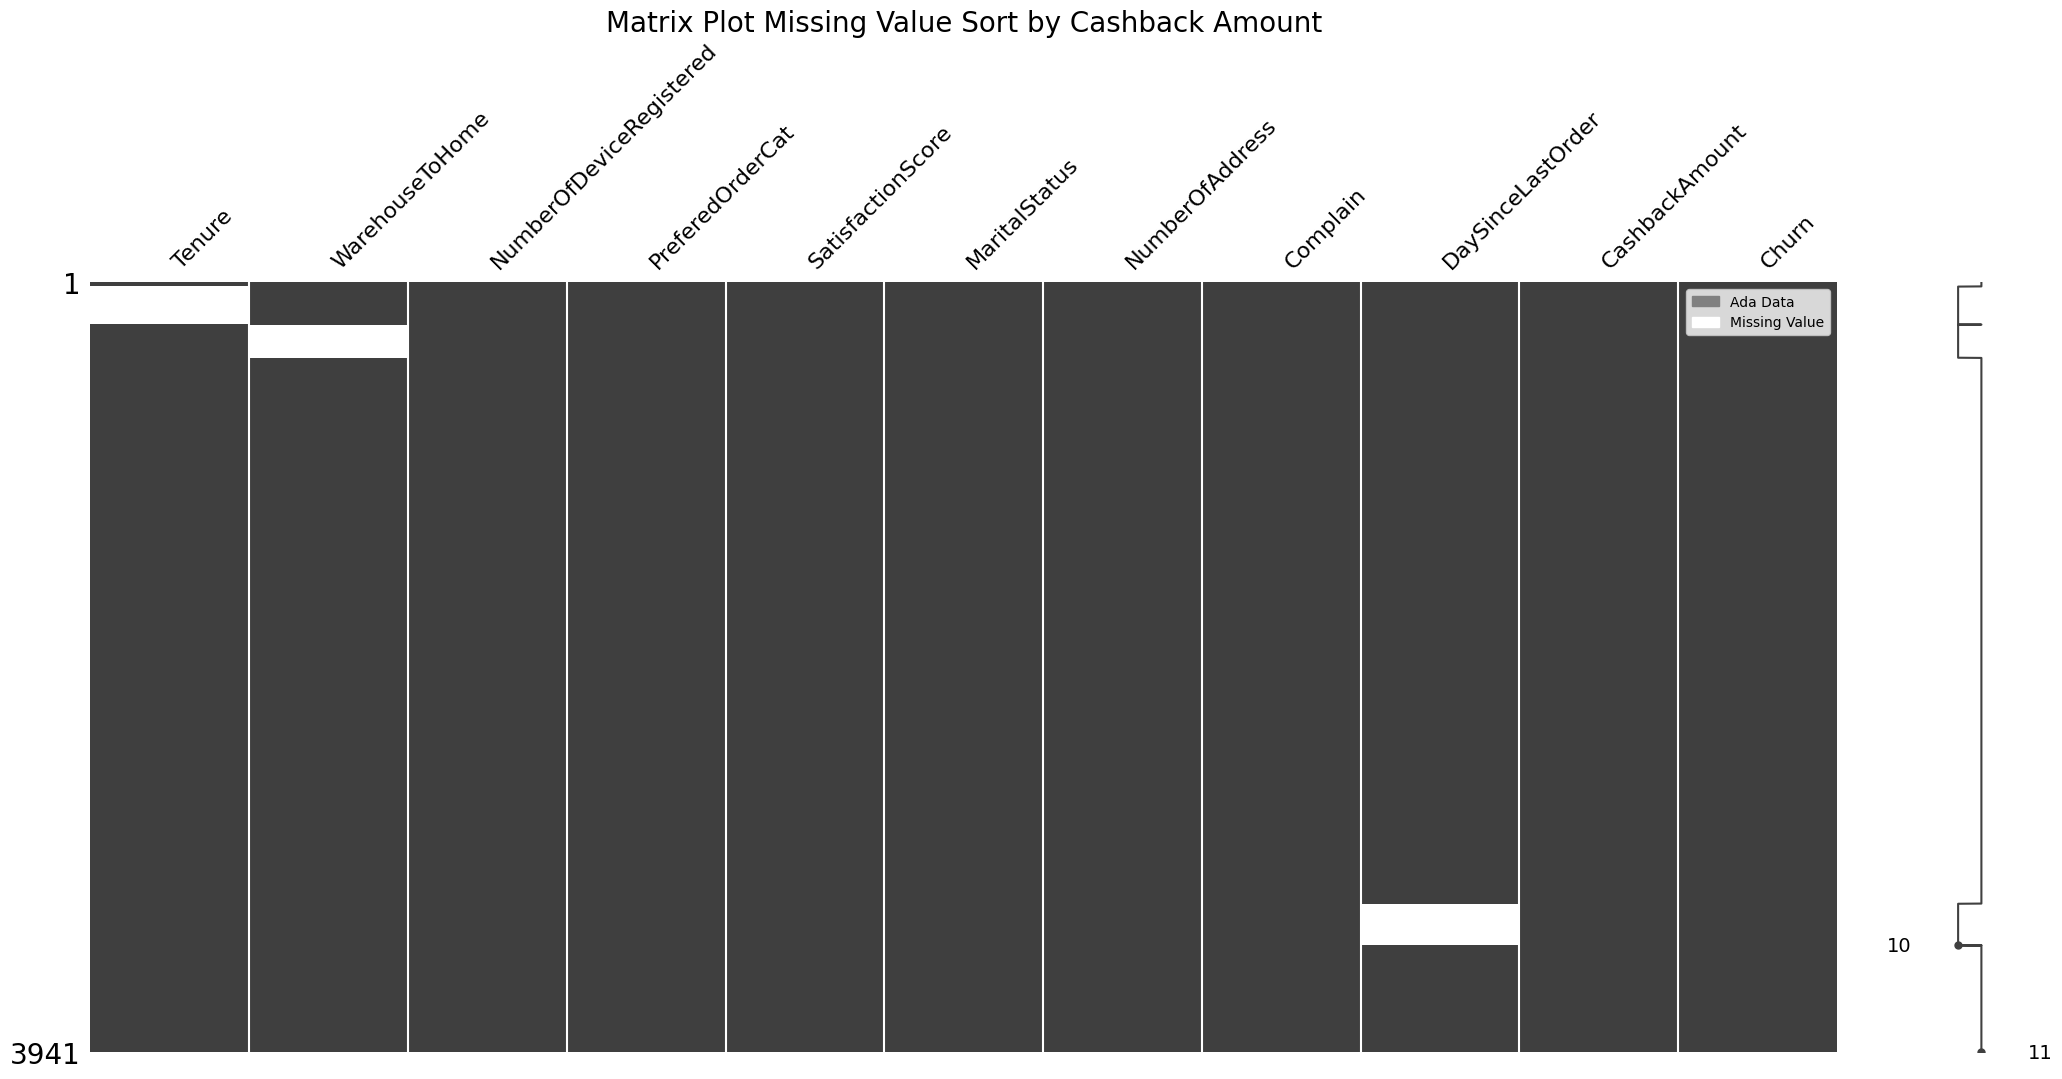

In [ ]:
# Matrix missingness sorted by satisfaction score
msno.matrix(df.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort by Cashback Amount', fontsize=20)
plt.show()

Terlihat bahwa missing value memiliki hubungan dengan variabel CashbackAmount. Hal ini menunjukkan data Missing at Random (MAR) atau terdapat hubungan sistematis antara variabel yang hilang dan variabel lain, tetapi tidak pada variabel yang memiliki missing value itu sendiri [ScienceDirect](https://www.sciencedirect.com/topics/mathematics/missing-at-random#:~:text=The%20assumption%20of%20Missing%20at,value%20of%20the%20variable%20itself.).

Metode yang akan digunakan adalah Iterative Imputation karena data berupa multivariate (dipengaruhi oleh variabel lain). Tidak bisa  menggunakan mean/median/mode imputation karena banyaknya missing value dapat menghasilkan hasil data cleansing yang bias dan mempengaruhi model [MachineLearningMastery](https://machinelearningmastery.com//iterative-imputation-for-missing-values-in-machine-learning/). Nanti akan dibahas pada tahapan preprocessing karena agak ribet kodenya.

##### *Data Balance Checking*

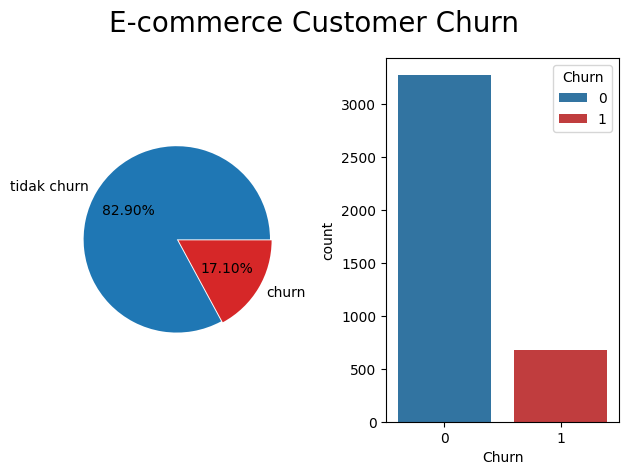

In [ ]:
sns.color_palette('pastel')
plt.figure().suptitle('E-commerce Customer Churn', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['tidak churn','churn'], colors= ['tab:blue','tab:red'],autopct='%.2f%%',explode=(0.01,0.01))
plt.subplot(1,2,2)
sns.countplot(data=df, x='Churn', hue = 'Churn', palette=['tab:blue',"tab:red"])
sns.color_palette('pastel')
plt.tight_layout()
plt.show()

Didapatkan informasi:
- Setelah dilakukan Cleaning, Target pada dataset ini masih berdistribusi timpang atau *Imbalance*.
- kelas 0 atau tidak churn sebanyak (82.90%), lebih besar dibanding kelas 1 atau Churn (17.10%).
- *Imbalance* akan berdampak pada performa yang buruk untuk memprediksi kelas minoritas. Sehingga perlu dilakukan penanganan terhadap *imbalance* tersebut pada data preprocessing.

##### *Duplicate Checking*

In [ ]:
df.duplicated().sum() #672

672

In [ ]:
df.drop_duplicates(keep='first',inplace=True)
df=df.reset_index().drop(columns = {'index'})

Data pelanggan dengan duplikat sebanyak 672 telah didrop dari dataset

##### *Outlier Checking*

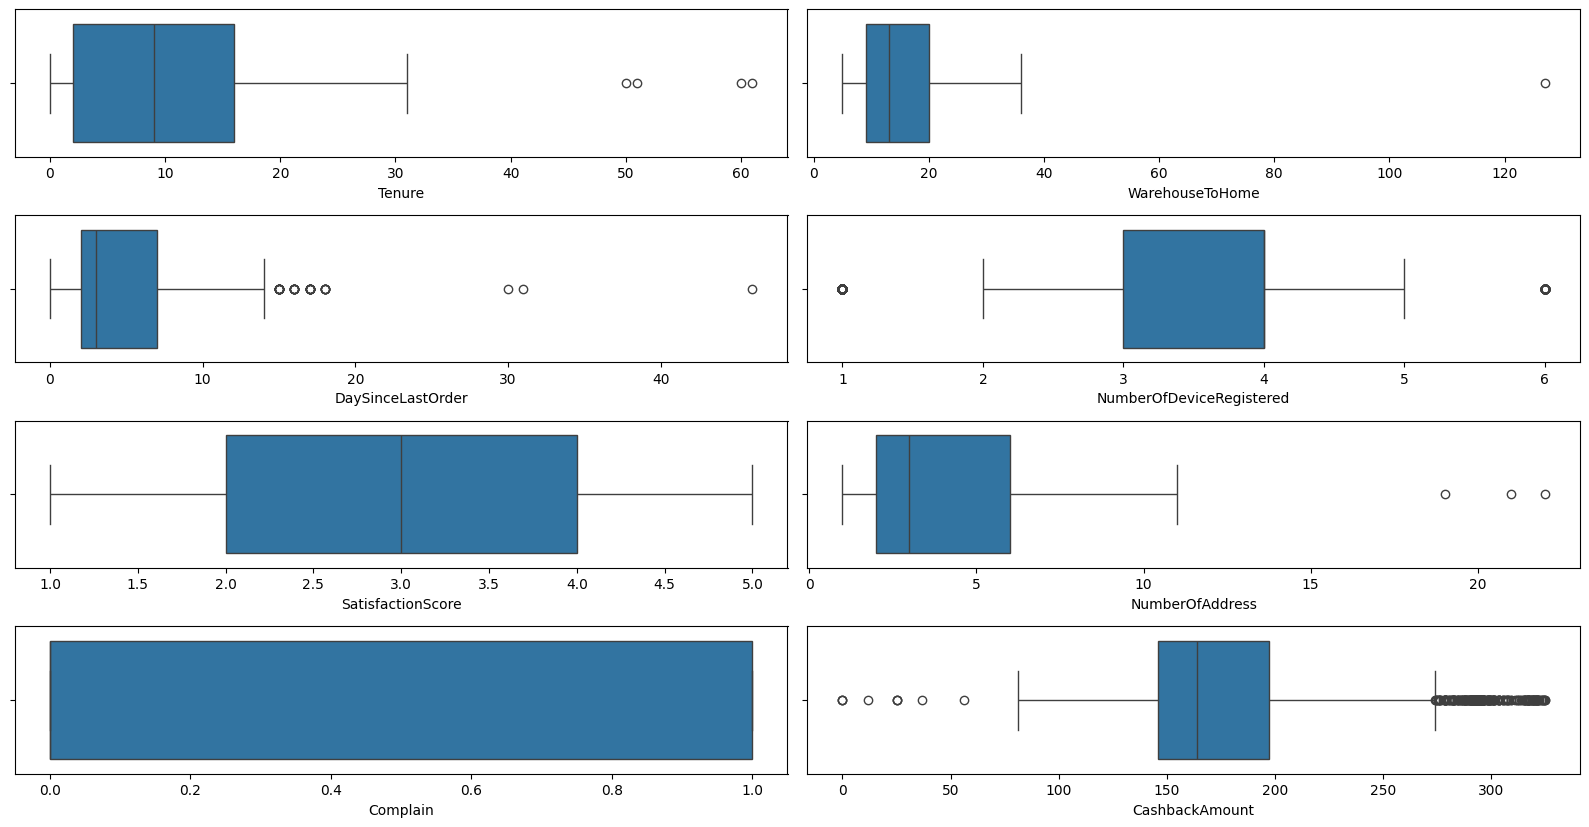

In [ ]:
numeric_col = ['Tenure','WarehouseToHome','DaySinceLastOrder','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','CashbackAmount']
col_names = numeric_col
plotnumber = 1
plt.figure(figsize=(16,10))

for columns in col_names:
    plt.subplot(5,2, plotnumber)
    sns.boxplot(data=df, x=columns)
    plt.tight_layout()

    plotnumber += 1

Beberapa kolom numerik ada outlier, namun pada kasus E-Commerce sangat wajar terjadi. Berdasarkan nilai pada boxplot setiap kolom terlihat bahwa outlier tersebut masih secara logika masuk akal.

####*Data Analytics for Preprocessing*

Data sebaiknya tetap dianalisis terlebih dahulu sebelum melakukan pemprosesan data menjadi lebih bersih sebelum dimasukkan kedalam model, agar hasil yang diberikan oleh model baik adanya. Analisis dilakukan kepada variabel-variabel dengan target variabel customer churn

##### *Continuous Variable*

<ipython-input-18-a9a4171acf05>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,a)


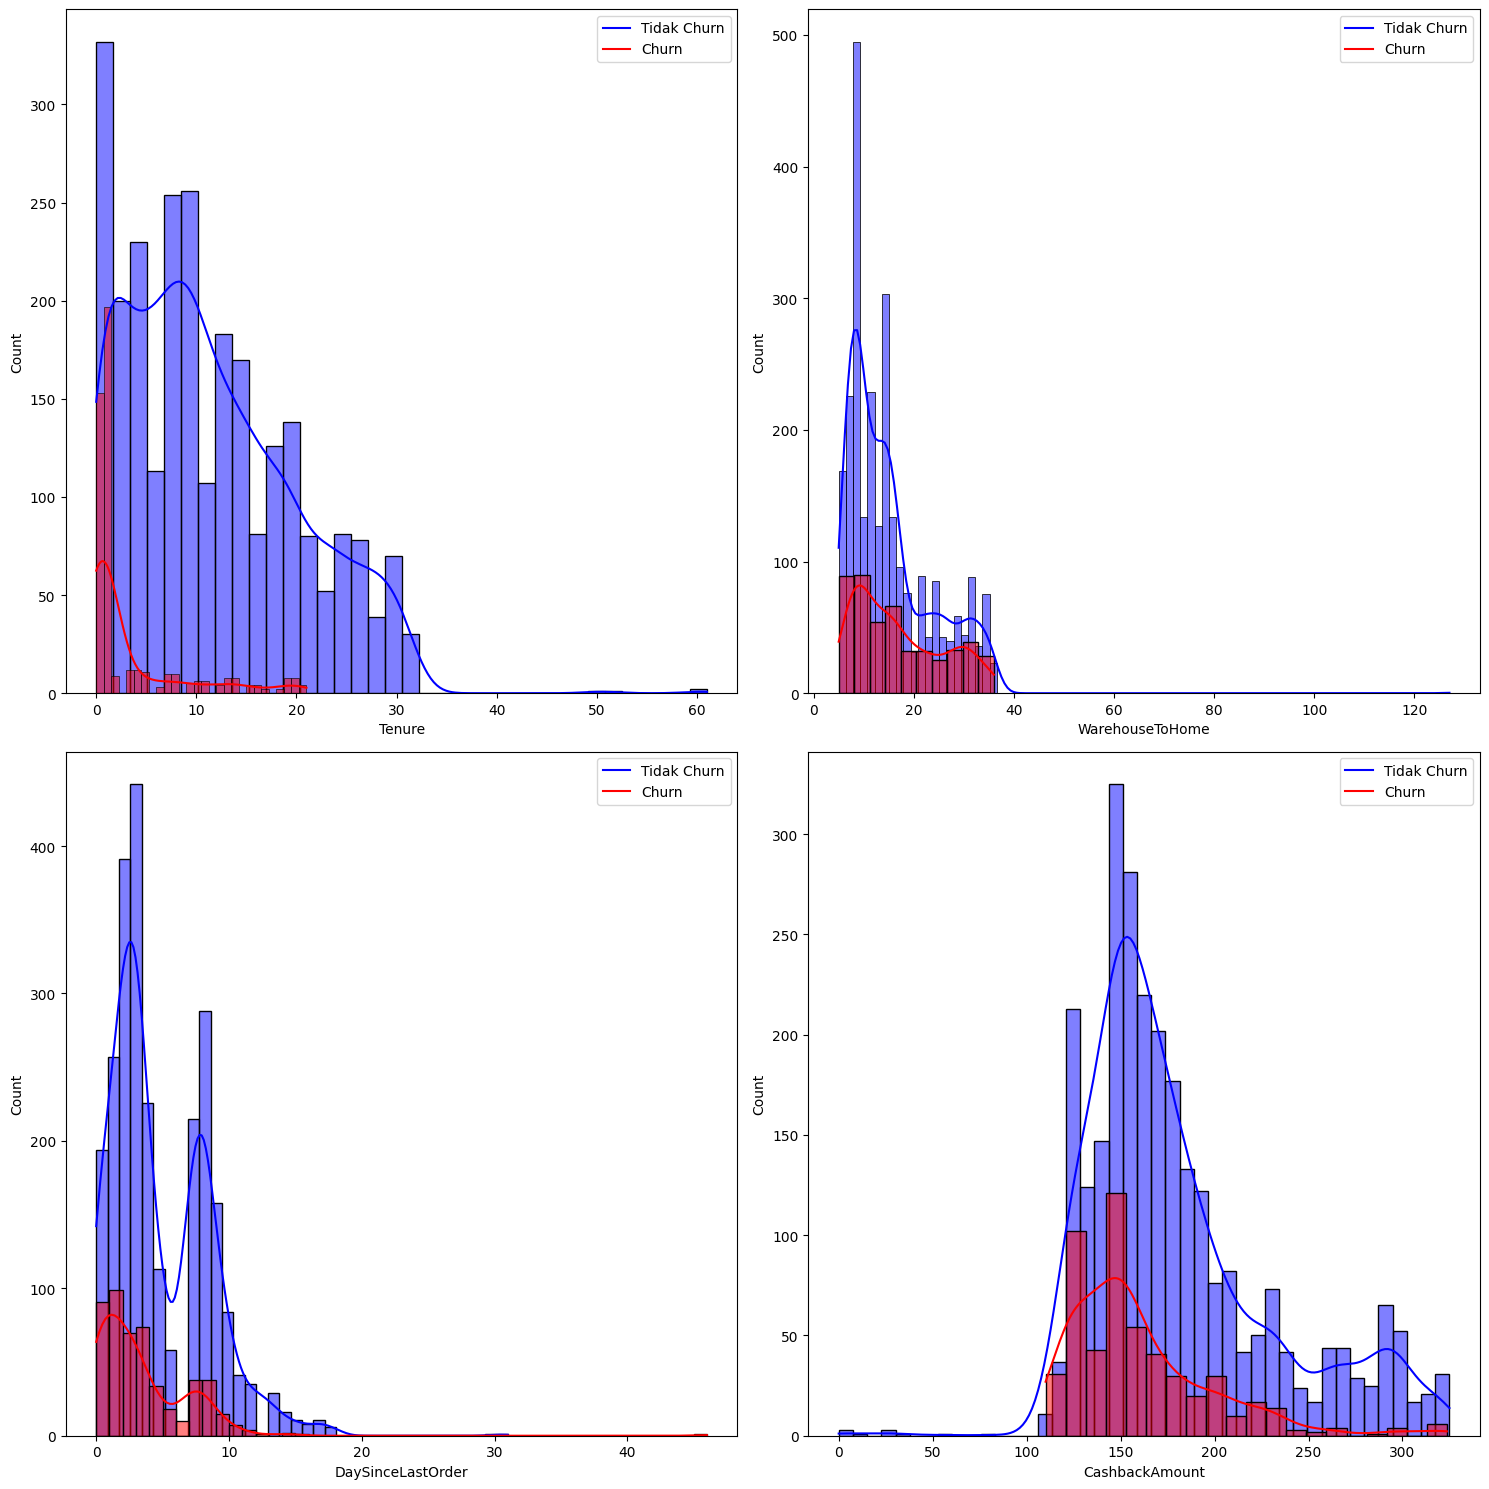

In [ ]:
continuous_var= ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
a=1
sns.color_palette('pastel')
plt.figure(figsize=(15,15))
plt.title('Continuous Variable to Customer Churn', fontsize=20)
for i in continuous_var:
    plt.subplot(2,2,a)
    sns.histplot(x=df[df['Churn']==0][i],kde=True,color='blue')
    sns.histplot(x=df[df['Churn']==1][i],kde=True,color='red')
    plt.legend(labels=['Tidak Churn','Churn'])
    plt.tight_layout()
    a+=1
plt.show()

Didapatkan informasi:
* Tenure: semakin kecil nilai tenure, maka semakin besar kemungkinan customer akan churn.
* WarehouseToHome: data customer churn terdistribusi cukup merata pada setiap jarak, namun kemungkinan churn akan menurun semakin jauh jarak gudang dengan rumah pelanggan.
* DaySinceLastOrder: Bentuk distribusi pada customer churn dan tidak churn hampir sama. Perlu dilakukan analisis lebih lanjut untuk korelasi data terhadap variabel churn.
* CashbackAmount: modus untuk customer churn dan tidak churn berada di sekitar 150.

Kemudian akan kita lihat distribusi rata-rata customer churn terhadap setiap variabel.

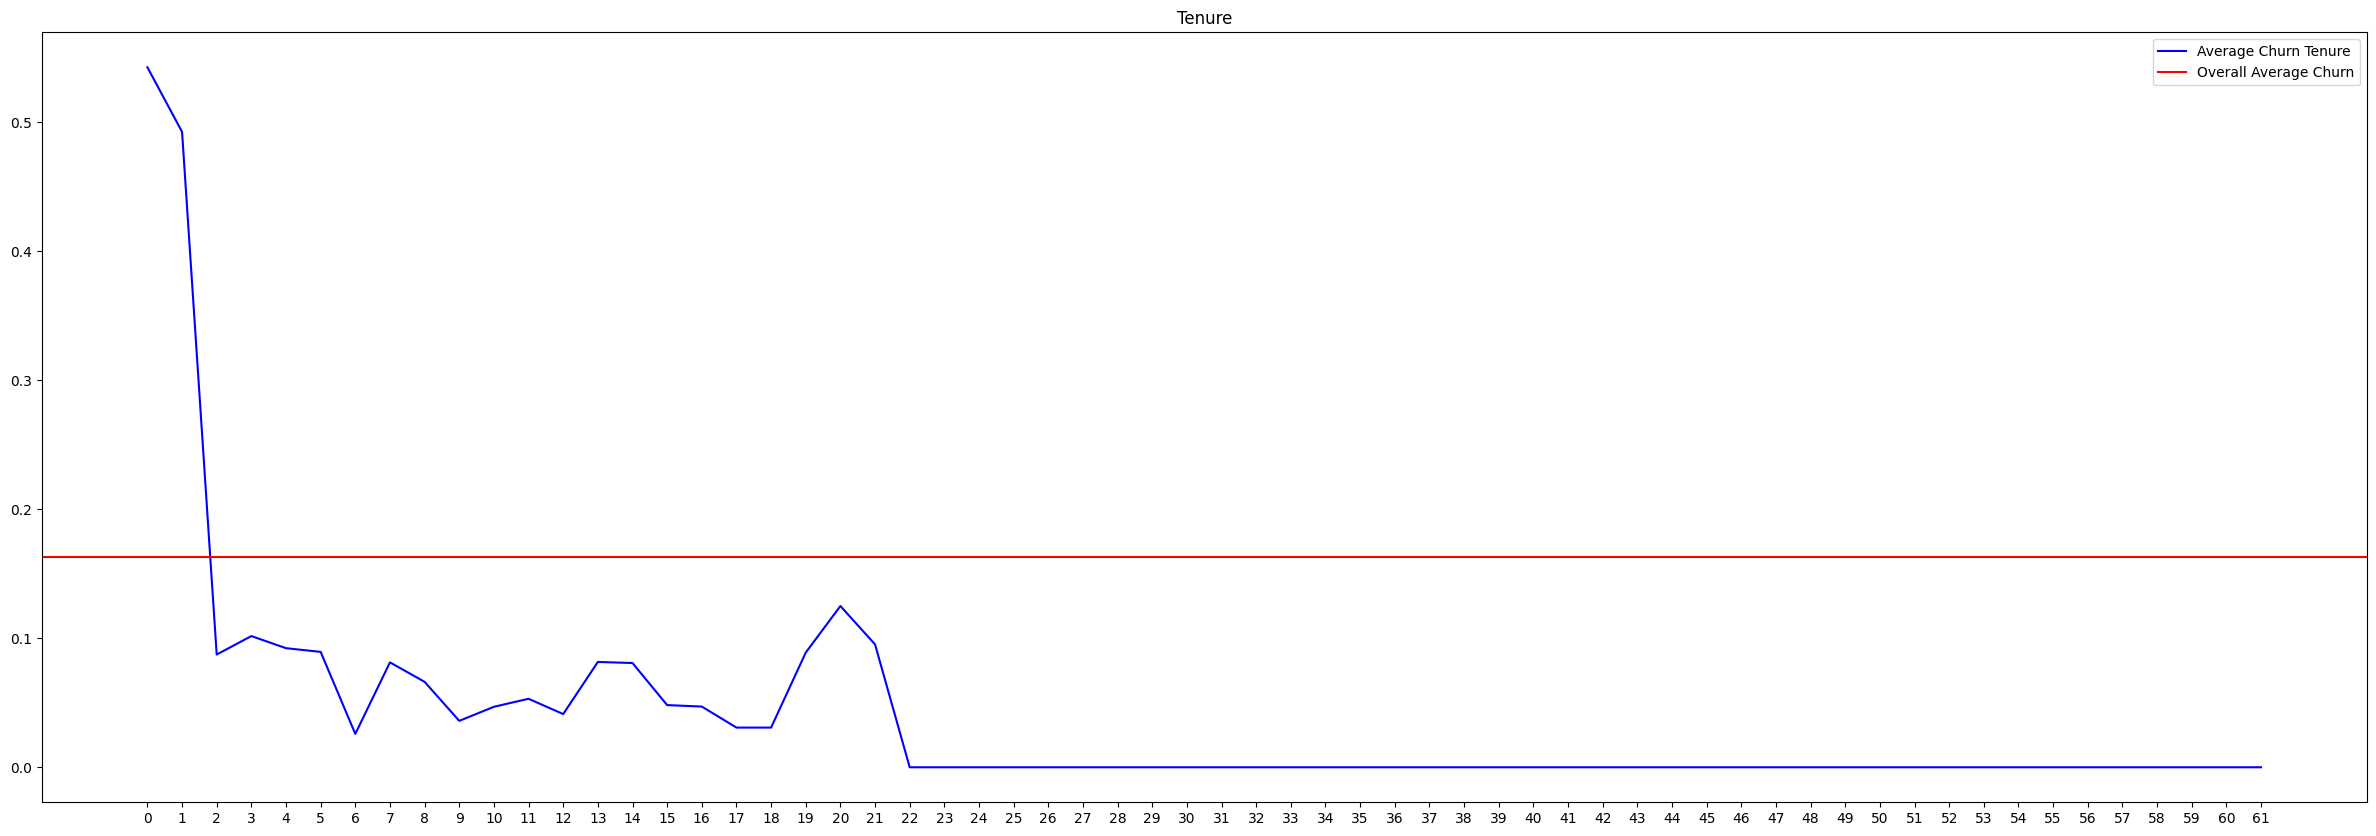

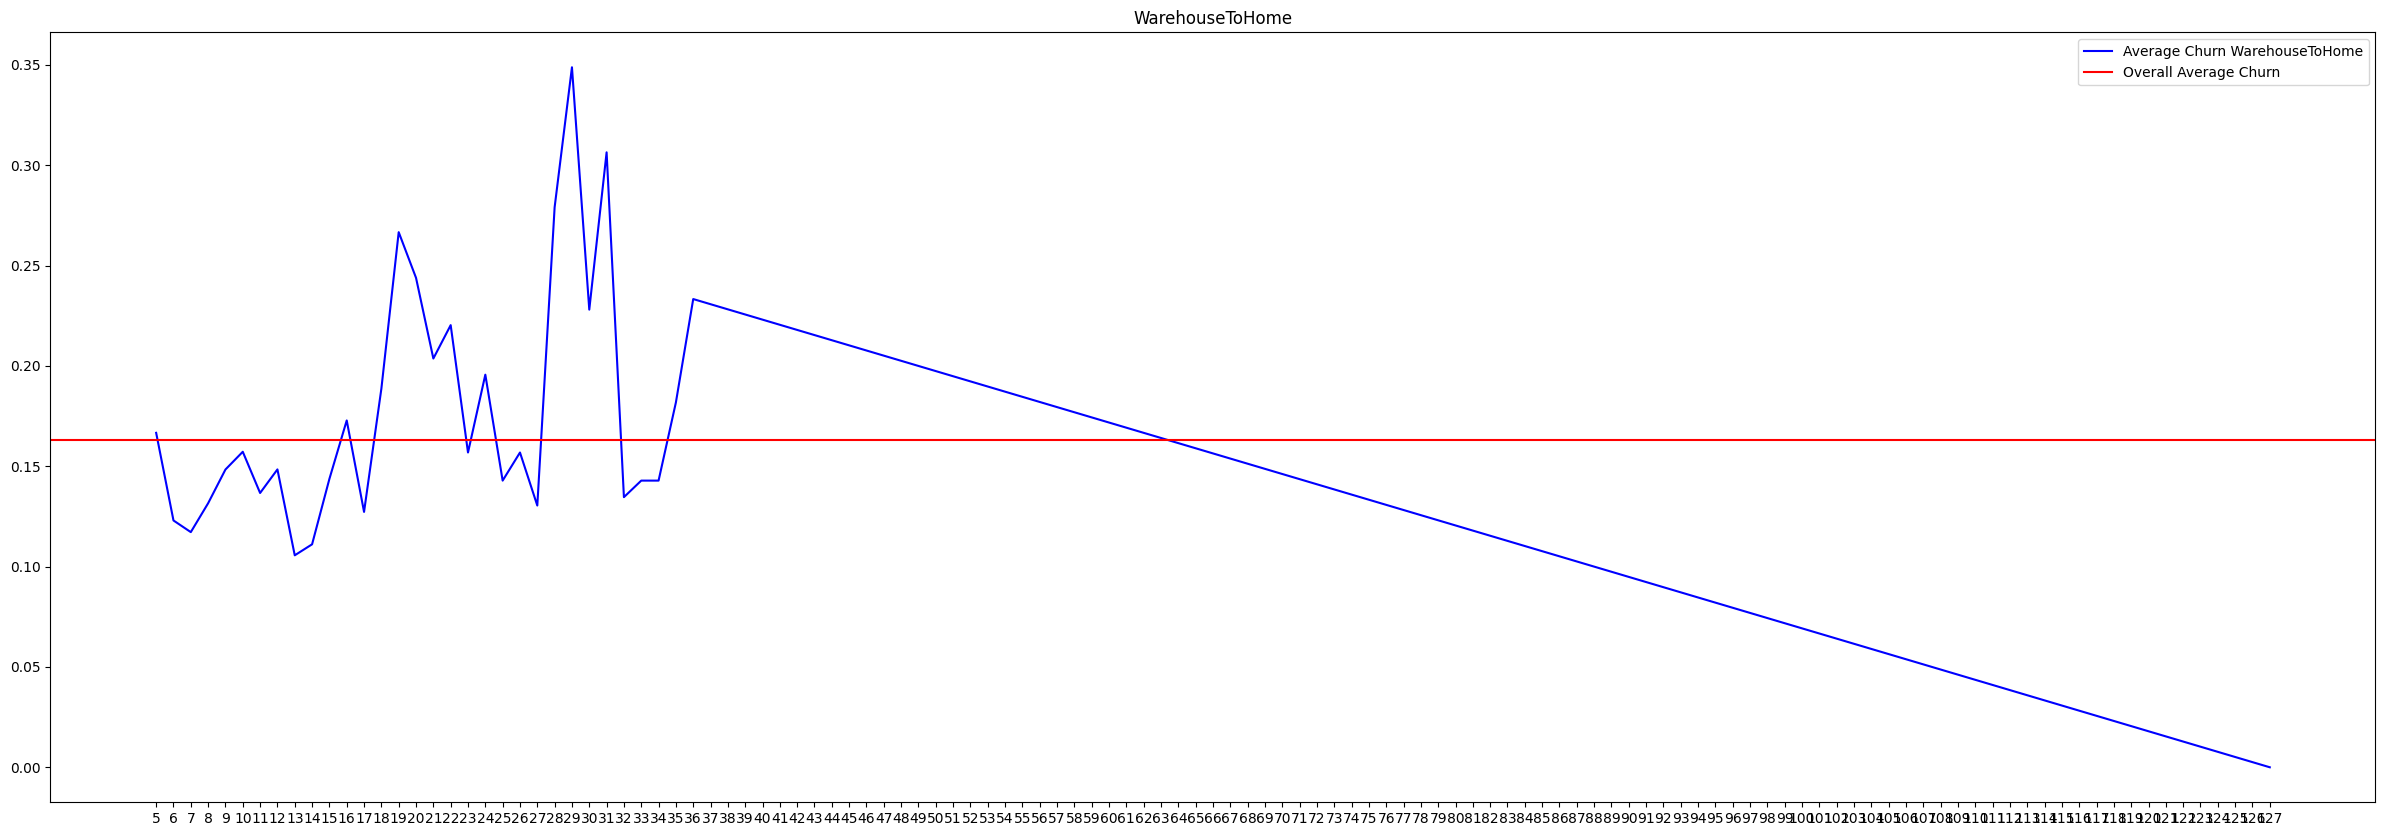

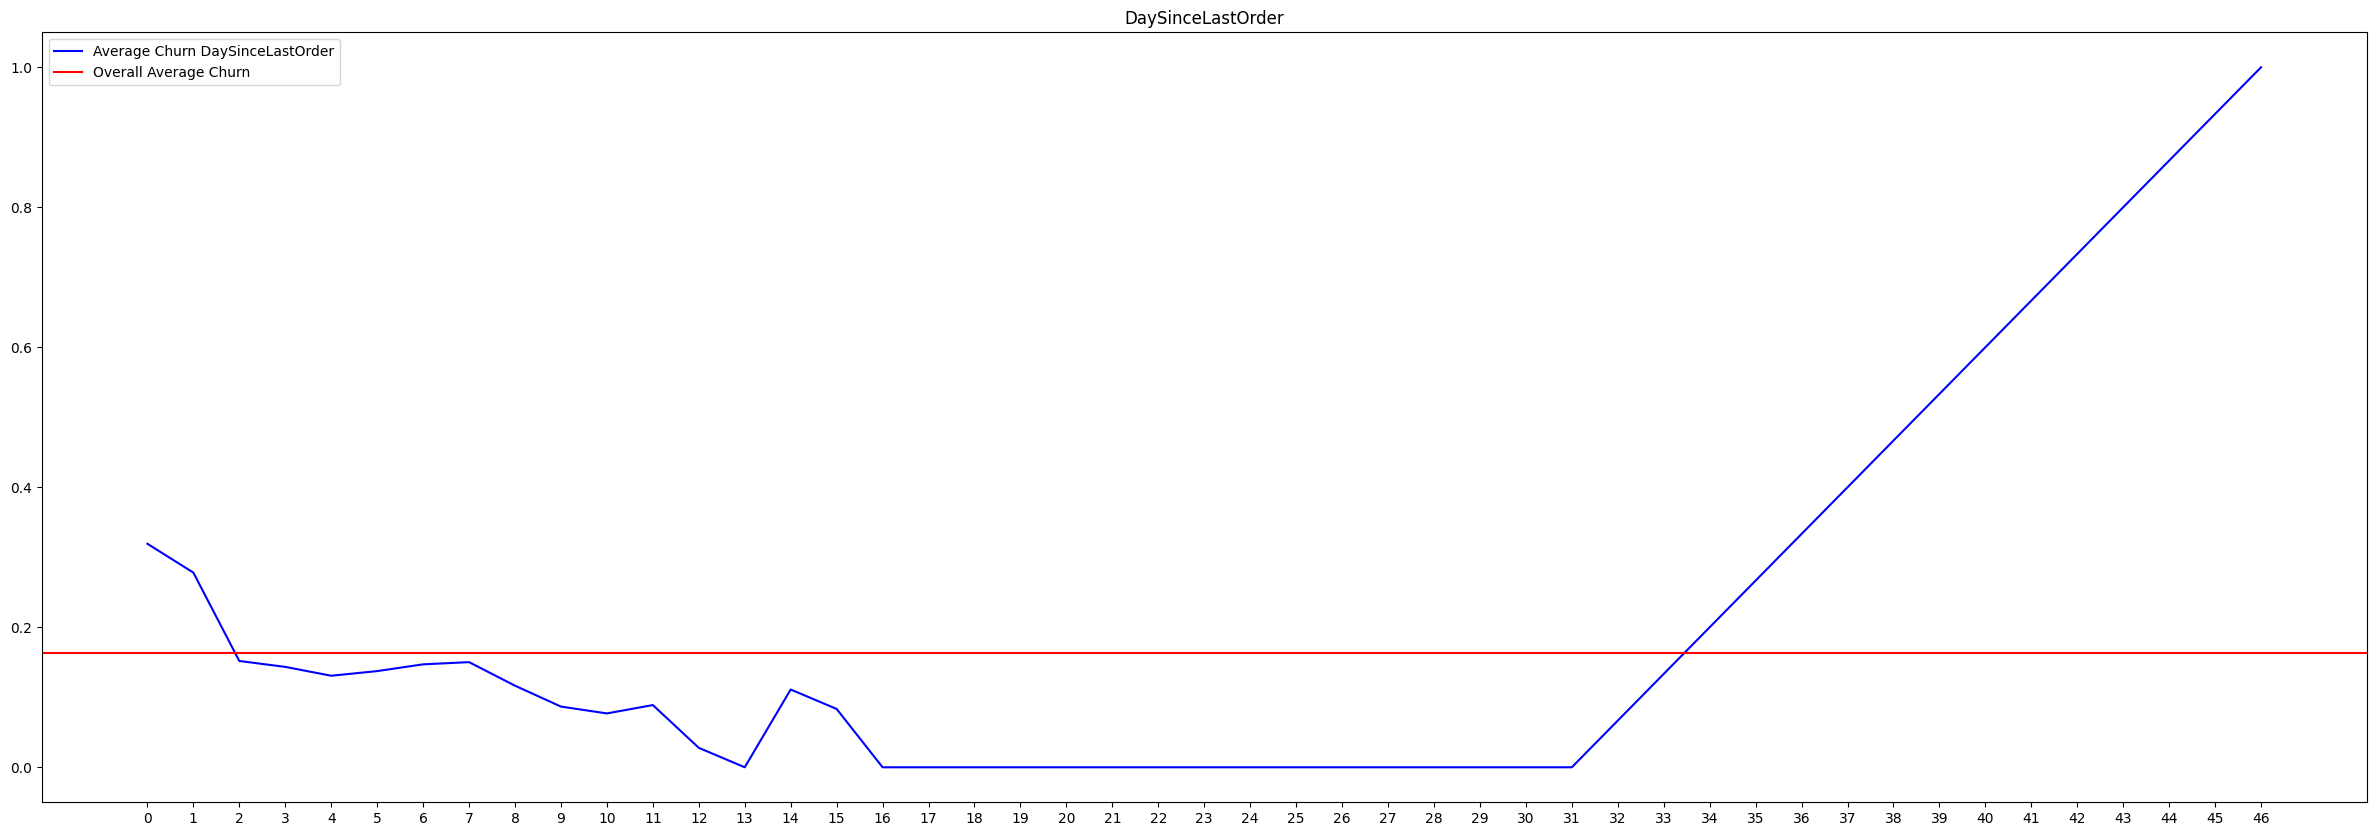

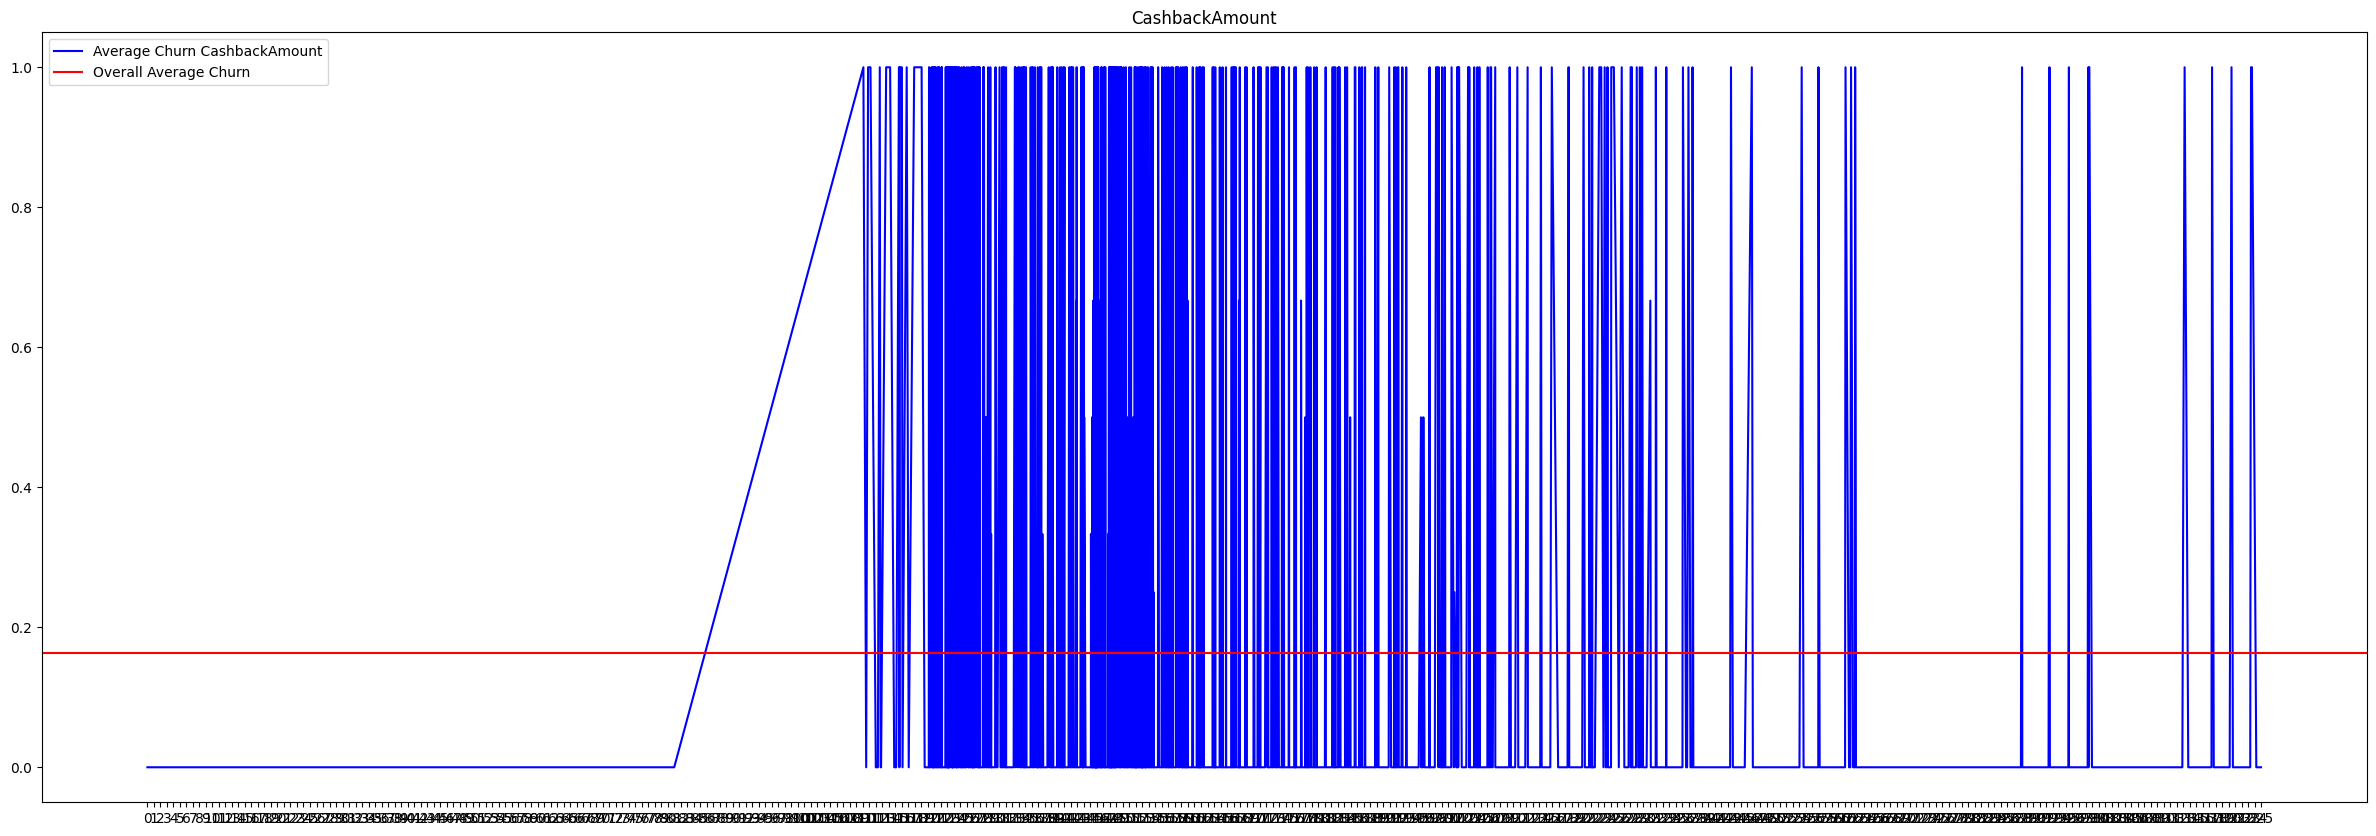

In [ ]:
# Average Churn per variable
ChurnAvg = df[df['Churn']==1]['Churn'].sum()/df.shape[0]
for i in continuous_var:
    plt.figure(figsize = (30,10))
    plt.plot(df.groupby(i)['Churn'].mean(), label=(f'Average Churn {i}'),color='b')
    plt.axhline(y = ChurnAvg,label='Overall Average Churn', color='r')
    plt.xticks(np.arange(min(df[i]), max(df[i])+1, 1.0))
    plt.tight_layout
    plt.title(i)
    plt.legend()
    plt.show()

Didapatkan informasi:
* Kebanyakan customer yang churn punya  masa tenure 0 sampai 2 bulan.
* Jarak gudang dengan rumah pelanggan pada 17-60 km menunjukkan tingkat churn yang lebih tinggi, hal ini bisa dipengaruhi oleh naiknya ongkos kirim. Namun, ketika jarak sudah terlalu jauh maka customer akan tetap menggunakan platform e-commerce
* DaySinceLastOrder pada 0-2 hari dan  diatas 31 hari memiliki customer churn yang tinggi.  
* CashbackAmount memiliki variansi customer churn yang tinggi, lakukan pengelompokkan dengan binning pada tahap preprocessing.

##### *Discrete Quantitative and Discrete Categorical Variable*

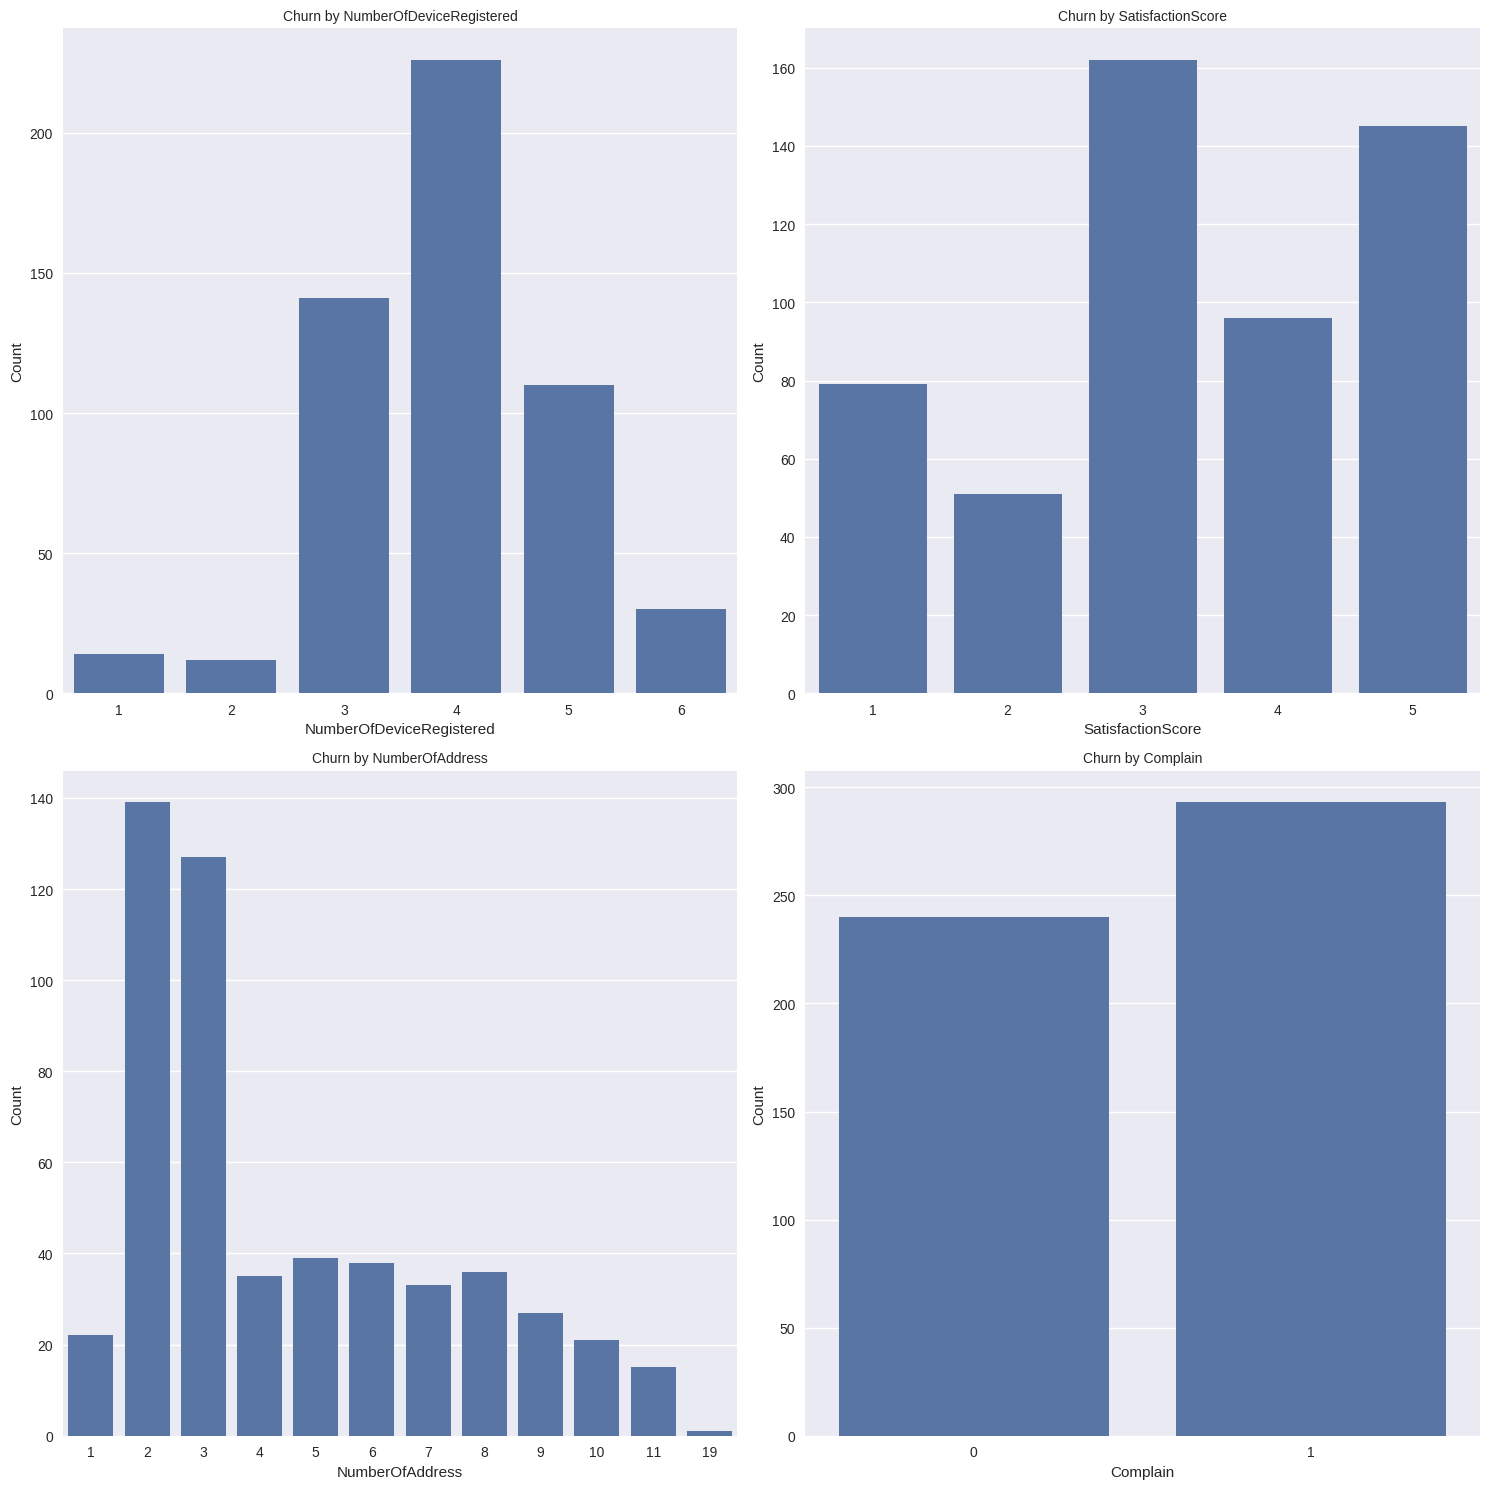

In [ ]:
#Churn per variable
discrete_var = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
a=1

plt.figure(figsize=(15,15))
for i in discrete_var:
    sns.color_palette('pastel')
    plt.subplot(2,2,a)
    sns.countplot(x=df[df['Churn']==1][i])
    plt.title(f'Churn by {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

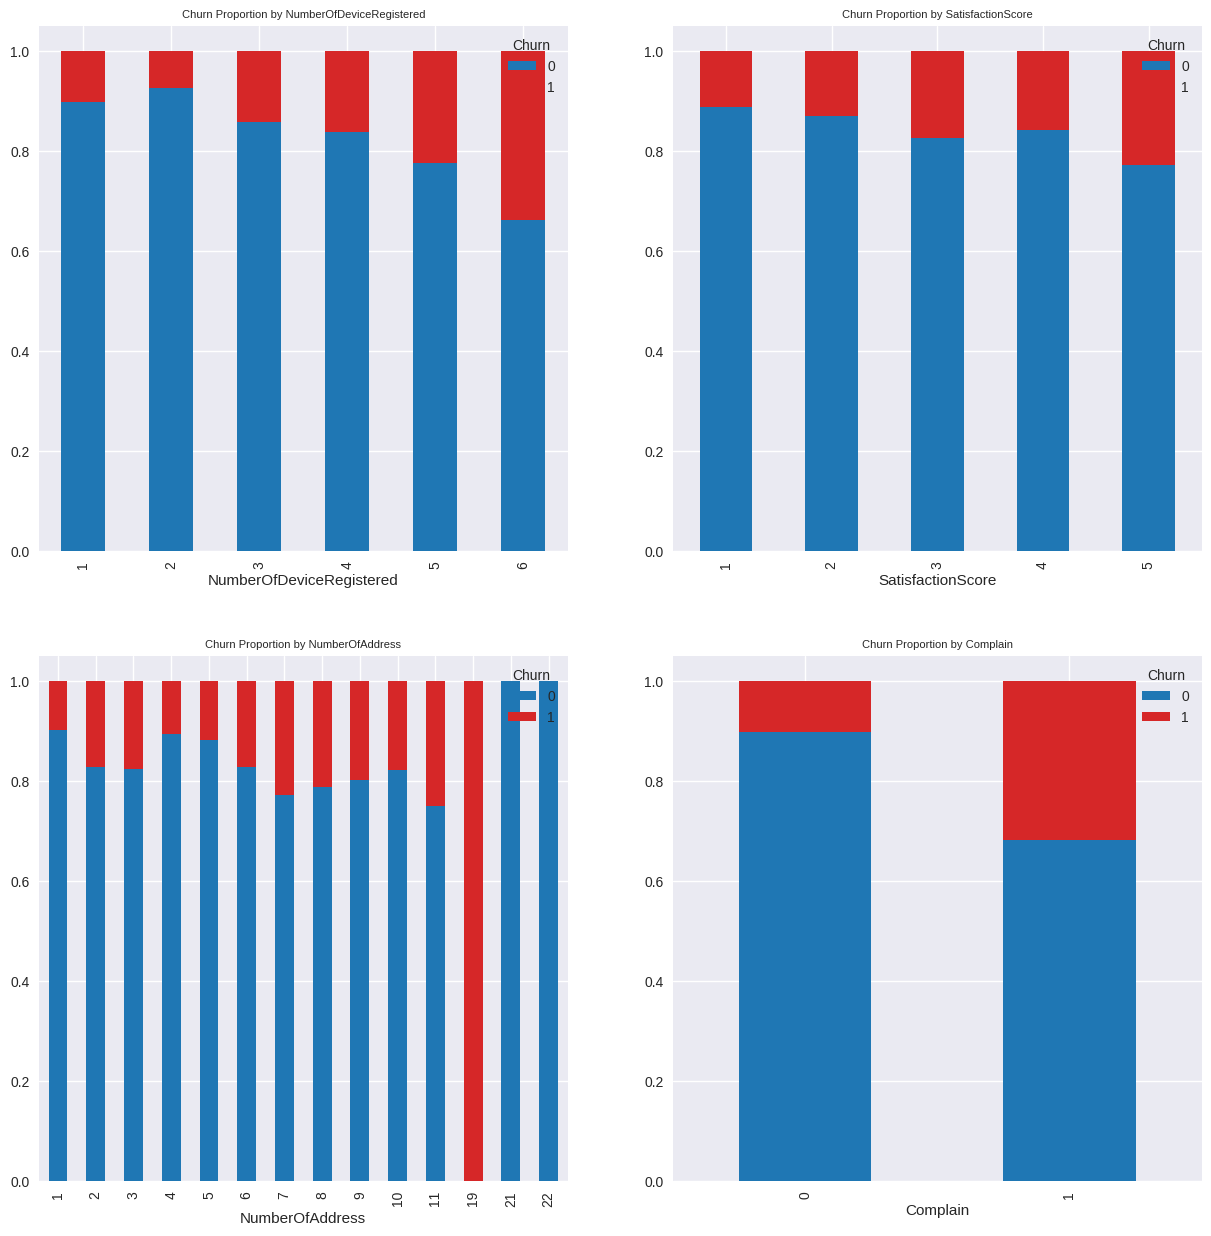

In [ ]:
# Churn Proportion per variable
a=1
plt.figure(figsize=(15,15))
for i in discrete_var:
    ax = plt.subplot(2,2,a)
    sns.color_palette('pastel')
    plt.title(f'Churn Proportion by {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar', stacked=True,ax=ax)
    a+=1
    plt.tight_layout
plt.show()

Didapatkan informasi:
* Customer yang churn paling banyak memiliki 3-4 device dan 2-3 alamat yang terdaftar pada platform. Tetapi jika dilihat berdasarkan proporsi, customer churn paling tinggi adalah pada pelanggan dengan 6 perangkat alamat.
* Proporsi pelanggan churn dengan rate tertinggi menilai kepuasan 5, dan pelanggan yang churn cenderung melakukan complain. Hal ini bisa saja karena pelanggan puas dengan platform e-commerce tetapi ada permasalahan dengan marketplace pada platform.

##### *Pure Categorical Variable*

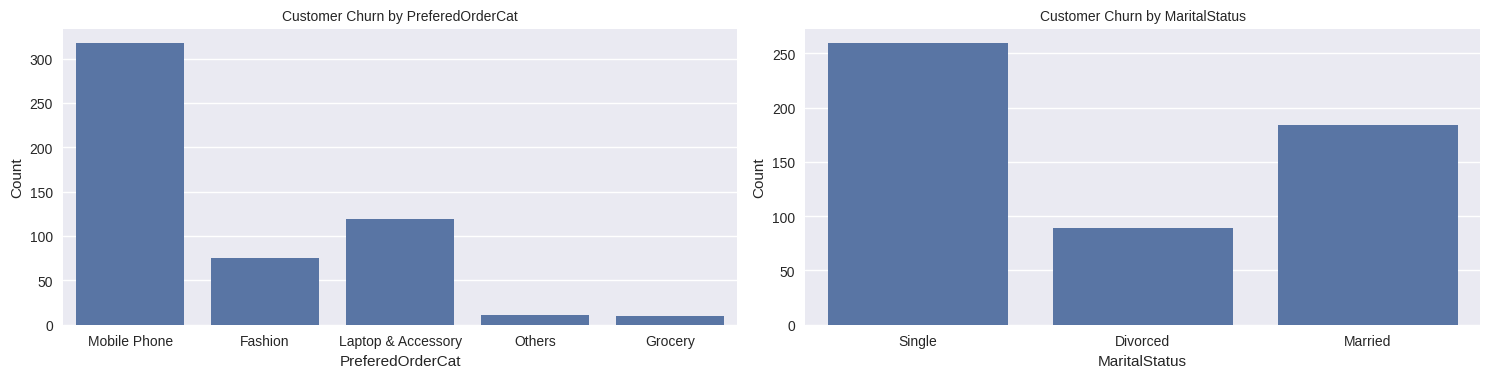

In [ ]:
# Churn per variable
categorical_var = ['PreferedOrderCat', 'MaritalStatus']
plt.figure(figsize=(15,7))
a=1
for i in categorical_var:
    plt.subplot(2,2,a)
    sns.color_palette('pastel')
    sns.countplot(x=df[df['Churn']==1][i])
    plt.title(f'Customer Churn by {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

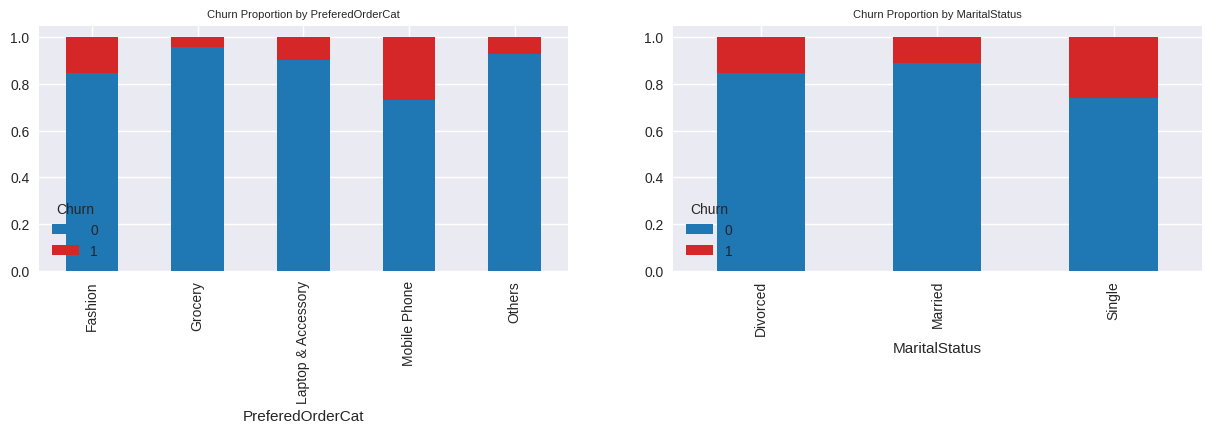

In [ ]:
# Churn Proportion per variable
a=1
plt.figure(figsize=(15,7))
for i in categorical_var:
    ax = plt.subplot(2,2,a)
    sns.color_palette('pastel')
    plt.title(f'Churn Proportion by {i}', fontsize=8)
    pd.crosstab(df[i],df['Churn'],normalize='index').sort_index().plot(color=['tab:blue',"tab:red"], kind='bar', stacked=True,ax=ax)
    a+=1
    plt.tight_layout
plt.show()

Didapatkan informasi:
Secara jumlah dan proporsi, customer yang churn cenderung membeli barang dengan Mobile Phone dan status jomblo.

####Data Preprocessing and Feature Engineering

Berdasarkan Data Cleaning and Analytics,
akan dilakukan preprocessing sebagai berikut:
* `CashbackAmount` bervariansi tinggi sehingga akan dibinning menjadi kolom kategorik baru, `CashbackAmountClass`, yang akan dilakukan Ordinal Encoding karena memiliki urutan tertentu.
* Handling missing value dengan IterativeImputer pada `Tenure`, `WarehouseToHome`, `DaySinceLastOrder` sesuai dengan hasil analisis.
* OneHotEncoding pada `MaritalStatus` yang hanya memiliki 3 kategori tanpa urutan.
* BinaryEncoding pada `PreferedOrderCat` yang memiliki 5 kategori tanpa urutan tertentu.


##### Binning and Encoding: CashbackAmount

In [ ]:
bin_labels= ['Miniscule', 'Small', 'Medium', 'Big', 'Enormous']
df['CashbackAmountClass']= pd.cut(df['CashbackAmount'], 5,labels = bin_labels)
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CashbackAmountClass
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,Medium
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0,Small
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Medium
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,Big
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Enormous


In [ ]:
# Ordinal mapping kolom cashbackamountclass
ordinal_mapping = [
    {'col':'CashbackAmountClass',
    'mapping':{
        'Miniscule' : 0,
        'Small': 1,
        'Medium': 2,
        'Big' : 3,
        'Enormous' : 4,
    }}
]

# Transformer
#transformer = ColumnTransformer([
#    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['CashbackAmountClass']),
#], remainder='passthrough')

##### Handling Missing Value: Tenure, WarehouseToHome, DaySinceLastOrder

In [ ]:
imputerCont = IterativeImputer(random_state=0, missing_values=np.nan)
imputerCont.fit(df[continuous_var])
df[continuous_var] = imputerCont.transform(df[continuous_var])

In [ ]:
# Melihat missing value
print(df.isna().sum())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
CashbackAmountClass         0
dtype: int64


##### Encoding: MaritalStatus, PreferedOrderCat


In [ ]:
# Transformer
transformer = ColumnTransformer([
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['CashbackAmountClass']),
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough')

##### Train-Test Splitting

Walaupun data testing terpisah sudah disiapkan panitia Purwadhika, perlu kita siapkan testing dari data yang ada untuk mengecek kualitas model.

In [ ]:
# Membuat fitur x dan target y
x = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# Melakukan data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

##*3. Modelling*

Berikut adalah jalan untuk mendapatkan model terbaik:
- Cross Validation semua model
- Balancing with Class Weight = `balanced`
- Resampling with SMOTE
- Feature Selection
- Model: Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boost, Ada Boost, Xtreme Gradient Boost, Light Gradient Boost, SVC

### Bare Model without Class Weight or Resampling

In [ ]:
# metrics
f2_score = make_scorer(fbeta_score, beta=2)

In [ ]:
logreg = LogisticRegression(random_state=1)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1)
svc = SVC(random_state=1)

In [ ]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
f2_mean=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    estimator = estimator.fit(x_train, y_train)
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=
                             f2_score)
    score.append(model_cv)
    f2_mean.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
                'Mean f2 score for Train Data':f2_mean,
                'Standard Deviation':std,
}).set_index('model').sort_values(by='Mean f2 score for Train Data',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162906 -> initscore=-1.636761
[LightGBM] [Info] Start training from score -1.636761
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:Bo

,Mean f2 score for Train Data,Standard Deviation
model,,
XGBoost,0.715116,0.056895
LightGBM,0.691697,0.052311
Decision Tree,0.661843,0.042921
AdaBoost,0.656757,0.031373
Random Forest,0.614395,0.037222
GBoost,0.599323,0.057546
Logistic Regression,0.499616,0.057106
KNN,0.369122,0.037208
SVC,0.000000,0.000000


### Model with Class Weight

Secara teori data imbalance baiknya menggunakan class weight, mari kita coba

In [ ]:
logreg = LogisticRegression(random_state=1, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1, class_weight='balanced')
rf = RandomForestClassifier(random_state=1, class_weight='balanced')
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1, class_weight='balanced')
lgb = LGBMClassifier(random_state=1, class_weight='balanced')
svc = SVC(random_state=1, class_weight='balanced')

In [ ]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
f2_mean=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    estimator = estimator.fit(x_train, y_train)
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    f2_mean.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
                'Mean f2 score for Train Data':f2_mean,
                'Standard Deviation':std,
}).set_index('model').sort_values(by='Mean f2 score for Train Data',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:Boos

,Mean f2 score for Train Data,Standard Deviation
model,,
LightGBM,0.773670,0.030015
XGBoost,0.715116,0.056895
Logistic Regression,0.678067,0.034192
Decision Tree,0.648493,0.037652
AdaBoost,0.648216,0.047292
SVC,0.604819,0.035842
GBoost,0.599323,0.057546
Random Forest,0.579487,0.056411
KNN,0.369122,0.037208


Didapatkan informasi:

Hasil f2 score pada model-model yang menggunakan `class_weight` = balance, menghasilkan f2 score yang lebih tinggi dibandingkan tanpa `class_weight` = balance.

Data imbalance mempengaruhi performa model dalam memprediksi kelas minoritas ( jumlah paling sedikit yaitu kelas 1 atau churn). Dengan penggunaan `class_weight` = balance model menjadi lebih baik, kedepannya akan terus digunakan.

Ditambah, model terbaik tanpa balancing data ialah XGBoost, dan berganti menjadi LightGBM pada data dengan class_weight balancing.

### Model with Resampling

Secara teori data imbalance baiknya menggunakan resampling, mari kita coba dengan SMOTE

In [ ]:
#Matikan Class Weight
logreg = LogisticRegression(random_state=1)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1)
svc = SVC(random_state=1)

In [ ]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
f2_mean=[]
std=[]

for i in models:
    smote_ = SMOTE(random_state=1)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    estimator = estimator.fit(x_train, y_train)
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    f2_mean.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
                'Mean f2 score for Train Data':f2_mean,
                'Standard Deviation':std,
}).set_index('model').sort_values(by='Mean f2 score for Train Data',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3132
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1751, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2891
[LightGBM] [Info] Number of data points in the train set: 3502, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Mean f2 score for Train Data,Standard Deviation
model,,
XGBoost,0.719210,0.054834
LightGBM,0.704013,0.053845
Logistic Regression,0.680339,0.044113
GBoost,0.655515,0.045421
Random Forest,0.652086,0.063076
Decision Tree,0.651059,0.032471
AdaBoost,0.650761,0.041566
SVC,0.623826,0.033457
KNN,0.591295,0.028507


Didapatkan informasi:

Hasil f2 score pada model-model yang menggunakan Resampling dengan SMOTE, menghasilkan f2 score yang tidak berbeda signifikan dibandingkan tanpa resampling. Sehingga kedepannya dapat digunakan ataupun di-drop.

Ditambah, model terbaik dengan dan tanpa resampling data ialah XGBoost.

### Model with Class Weight and Resampling

Gabungan keduanya apakah lebih tinggi score F2nya?

In [ ]:
logreg = LogisticRegression(random_state=1, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=1, class_weight='balanced')
rf = RandomForestClassifier(random_state=1, class_weight='balanced')
ada = AdaBoostClassifier(tree, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
lgb = LGBMClassifier(random_state=1, class_weight='balanced')
svc = SVC(random_state=1, class_weight='balanced')

In [ ]:
models = [logreg,knn,tree,rf,ada,gbc,xgb,lgb,svc]
score=[]
f2_mean=[]
std=[]

for i in models:
    smote_ = SMOTE(random_state=1)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    estimator = estimator.fit(x_train, y_train)
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    f2_mean.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBoost','XGBoost', 'LightGBM', 'SVC'],
                'Mean f2 score for Train Data':f2_mean,
                'Standard Deviation':std,
}).set_index('model').sort_values(by='Mean f2 score for Train Data',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3132
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1751, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2891
[LightGBM] [Info] Number of data points in the train set: 3502, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1751, number of negative: 

,Mean f2 score for Train Data,Standard Deviation
model,,
XGBoost,0.719210,0.054834
LightGBM,0.704013,0.053845
Logistic Regression,0.680339,0.044113
GBoost,0.655515,0.045421
Random Forest,0.652086,0.063076
Decision Tree,0.651059,0.032471
AdaBoost,0.650761,0.041566
SVC,0.623826,0.033457
KNN,0.591295,0.028507


Didapatkan informasi:

Hasil f2 score pada model-model yang menggunakan Class Weight Balanced dan Resampling dengan SMOTE, menghasilkan f2 score yang tidak berbeda signifikan. Kesimpulan akhir menggunakan Class Weight saja.

Ditambah, model terbaik dengan class weight dan resampling data ialah XGBoost.

### Kesimpulan sebelum Tuning

Model: XGBoost, Light GBM
Preprocessing: Class Weight Balancing

##*4. Hyperparameter Tuning*

Hyperparameter tuning dilakukan untuk mengontrol perilaku model machine learning yang dijalankan. Akan dilakukan hyperparameter tuning pada model XGBoost dan Light GBM agar mendapatkan model yang lebih optimal.

###*Light GBM*

In [ ]:
# LightGBM Hyperparameter Tuning

lgb = LGBMClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ("model", lgb)
  ],verbose=True)

hyperparam_space=[{
    'model__max_bin': [700, 650, 600],
    'model__num_leaves':[30, 25, 20],
    'model__min_data_in_leaf': [10],
    'model__num_iterations':[225, 250],
    'model__learning_rate': [0.03, 0.04],
    'model__max_depth' : [15, 20, 25],
    'model__random_state':[0, 1]
}]

lgb_grid_f2 = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_space,
                      cv = skfold,
                      scoring = f2_score,
                      n_jobs=-1)

lgb_grid_f2.fit(x_train,y_train)

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': Miniscule    0
Small        1
Medium       2
Big          3
Enormous     4
dtype: int64}]),
                                                                         ['CashbackAmountClass']),
                                                                        ('on...
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=1))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.03, 0.04],
                          'model__max_bin': [700, 650, 600],
                          'model__max_depth': [15, 20, 25],
                          'model__min_data_in_leaf': [10],
                          'model__num_iterations': [225, 250],
                          'model__num_leaves': [30, 25, 20],
                          'model__random_state': [0, 1]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [ ]:
print('Light GBM')
print('Best_score:', lgb_grid_f2.best_score_)
print('Best_params:', lgb_grid_f2.best_params_)

Light GBM
Best_score: 0.807007864884949
Best_params: {'model__learning_rate': 0.03, 'model__max_bin': 650, 'model__max_depth': 15, 'model__min_data_in_leaf': 10, 'model__num_iterations': 225, 'model__num_leaves': 20, 'model__random_state': 0}


Parameter terbaik untuk Model Light GBM
 - `learning_rate`    : 0.03
 - `max_bin`          : 650
 - `max_depth`        : 15
 - `min_data_in_leaf` : 10
 - `num_iterations`   : 225
 - `num_leaves`       : 20
 - `random_state`     : 0

###*XGBoost*

In [ ]:
# XGBoost Hyperparameter Tuning

xgb = XGBClassifier(random_state=1, class_weight='balanced')

clf = imblearn.pipeline.Pipeline(steps=[
    ("Transformation",transformer),
    ("model", xgb)
  ],verbose=True)


hyperparam_xgb = [{
              'model__n_estimators':[150, 200, 250],
              'model__subsample':[0.8, 1],
              'model__learning_rate':[0.03, 0.04],
              'model__max_depth':[15, 20],
              'model__random_state':[0, 1]}]

xgb_grid_f2 = GridSearchCV(estimator = clf,
                      param_grid = hyperparam_xgb,
                      cv = skfold,
                      scoring = f2_score,
                      n_jobs=-1)

xgb_grid_f2.fit(x_train,y_train)

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:07:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[Pipeline] ............. (step 2 of 2) Processing model, total=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': Miniscule    0
Small        1
Medium       2
Big          3
Enormous     4
dtype: int64}]),
                                                                         ['CashbackAmountClass']),
                                                                        ('on...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.03, 0.04],
                          'model__max_depth': [15, 20],
                          'model__n_estimators': [150, 200, 250],
                          'model__random_state': [0, 1],
                          'model__subsample': [0.8, 1]}],
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [ ]:
print('XGBoost')
print('Best_score:', xgb_grid_f2.best_score_)
print('Best_params:', xgb_grid_f2.best_params_)

XGBoost
Best_score: 0.7113920697057077
Best_params: {'model__learning_rate': 0.04, 'model__max_depth': 20, 'model__n_estimators': 250, 'model__random_state': 0, 'model__subsample': 0.8}


Parameter terbaik untuk Model XGBoost
 - `learning_rate`    : 0.04
 - `max_depth`        : 20
 - `n_estimators`     : 250
 - `random_state`     : 0
 - `subsample`        : 0.8

##*5. Model Evaluation*

Evaluasi model berdasarkan metrics sesudah dilakukan hyperparameter tuning

###*Light GBM*

In [ ]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',lgb)])
estimator = estimator.fit(x_train, y_train)

y_pred_default_lgbm = estimator.predict(x_test)
f2_default = fbeta_score(y_test, y_pred_default_lgbm, beta=2)
print(f'F2 Score Light GBM Base Model :', f2_default)

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
F2 Score Light GBM Base Model : 0.7815275310834814


In [ ]:
y_pred_test_tunned_lgbm = lgb_grid_f2.best_estimator_.predict(x_test)
f2_test_tunned = fbeta_score(y_test, y_pred_test_tunned_lgbm, beta=2)
print(f'F2 Score Light GBM Hyperparameter Tuned :', f2_test_tunned)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
F2 Score Light GBM Hyperparameter Tuned : 0.7931034482758621


In [ ]:
report_default = classification_report(y_test, y_pred_default_lgbm)
report_tuned = classification_report(y_test, y_pred_test_tunned_lgbm)

print('Classification Report Based Model Light GBM : \n', report_default)
print('Classification Report Hyperparameter Tuned Light GBM : \n', report_tuned)

Classification Report Based Model Light GBM : 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       547
           1       0.65      0.82      0.73       107

    accuracy                           0.90       654
   macro avg       0.81      0.87      0.83       654
weighted avg       0.91      0.90      0.90       654

Classification Report Hyperparameter Tuned Light GBM : 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       547
           1       0.61      0.86      0.71       107

    accuracy                           0.89       654
   macro avg       0.79      0.88      0.82       654
weighted avg       0.91      0.89      0.89       654



Diperoleh hasil sebagai berikut.

| Model | Metrics | Values |
| --- | --- | --- |
| Light GBM Base Model  | Accuracy - Recall 1 - F2 Score | 0.9 - 0.82 - 0.7815 |
| Light GBM Hyperparameter Tuned | Accuracy - Recall 1 - F2 Score | 0.89 - 0.86 - 0.7931 |

Secara overall, Hyperparameter Tuning meningkatkan sedikit metriks evaluasi yang diperhitungkan.

###*XGBoost*

In [ ]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',xgb)])
estimator = estimator.fit(x_train, y_train)

y_pred_default_xgb = estimator.predict(x_test)
f2_default = fbeta_score(y_test, y_pred_default_xgb, beta=2)
print(f'F2 Score XGBoost Base Model :', f2_default)

F2 Score XGBoost Base Model : 0.6756756756756757


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:47:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred_test_tunned_xgb = xgb_grid_f2.best_estimator_.predict(x_test)
f2_test_tunned = fbeta_score(y_test, y_pred_test_tunned_xgb, beta=2)
print(f'F2 Score XGBoost Hyperparameter Tuned :', f2_test_tunned)

F2 Score XGBoost Hyperparameter Tuned : 0.6805293005671077


In [ ]:
report_default = classification_report(y_test, y_pred_default_xgb)
report_tuned = classification_report(y_test, y_pred_test_tunned_xgb)

print('Classification Report Based Model XGBoost : \n', report_default)
print('Classification Report Hyperparameter Tuned XGBoost : \n', report_tuned)

Classification Report Based Model XGBoost : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       547
           1       0.78      0.65      0.71       107

    accuracy                           0.91       654
   macro avg       0.86      0.81      0.83       654
weighted avg       0.91      0.91      0.91       654

Classification Report Hyperparameter Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       547
           1       0.71      0.67      0.69       107

    accuracy                           0.90       654
   macro avg       0.82      0.81      0.82       654
weighted avg       0.90      0.90      0.90       654



Diperoleh hasil sebagai berikut.

| Model | Metrics | Values |
| --- | --- | --- |
| XGBoost Base Model  | Accuracy - Recall 1 - F2 Score | 0.91 - 0.65 - 0.6757 |
| XGBoost Hyperparameter Tuned | Accuracy - Recall 1 - F2 Score | 0.90 - 0.67 - 0.6805 |

Secara overall, Hyperparameter Tuning meningkatkan sedikit metriks evaluasi yang diperhitungkan.

###*Final Model*

| Model | Metrics | Values |
| --- | --- | --- |
| XGBoost Base Model  | Accuracy - Recall 1 - F2 Score | 0.91 - 0.65 - 0.6757 |
| XGBoost Hyperparameter Tuned | Accuracy - Recall 1 - F2 Score | 0.90 - 0.67 - 0.6805 |
| Light GBM Base Model  | Accuracy - Recall 1 - F2 Score | 0.9 - 0.82 - 0.7815 |
| Light GBM Hyperparameter Tuned | Accuracy - Recall 1 - F2 Score | 0.89 - 0.86 - 0.7931 |


Best (Final) Model ialah Light GBM yang telah dilakukan Hyperparameter Tuning


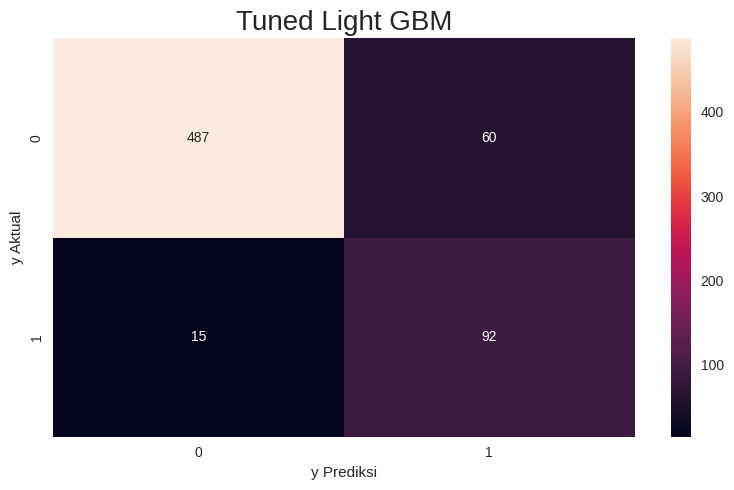

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test_tunned_lgbm), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'''Tuned Light GBM''', size=20)
plt.tight_layout()
plt.show()

In [ ]:
best_model = lgb_grid_f2.best_estimator_
save_model = best_model.fit(x_train, y_train)
pickle.dump(save_model, open('/content/final_model.sav', 'wb'))

[Pipeline] .... (step 1 of 2) Processing Transformation, total=   0.1s
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s


##*6. Feature Importance and Explanation*

Evaluasi model berdasarkan metrics sesudah dilakukan hyperparameter tuning.

In [ ]:
lgbm = best_model
ohe_cols = list(lgbm[0].transformers_[0][1].get_feature_names_out())
ordinal_cols = list(lgbm[0].transformers_[1][1].get_feature_names_out())
binary_cols = list(lgbm[0].transformers_[2][1].get_feature_names_out())
remainder_cols = list(lgbm[0].transformers_[3][1].get_feature_names_out())
cols = ohe_cols + ordinal_cols + binary_cols + remainder_cols

# Preprocessing
candidate_pre = lgbm.named_steps['Transformation'].transform(df) # Preprocessed Data

model = lgbm.named_steps['model'] # Get Model
features = cols # Preprocessed Data Column Names

shap_values = shap.TreeExplainer(model,
                                 data = candidate_pre,
                                #feature_dependence="independent",
                                 feature_perturbation="interventional",
                                 model_output="probability").shap_values(candidate_pre)


 98%|===================| 3196/3269 [00:35<00:00]       

In [ ]:
cols

['CashbackAmountClass',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'PreferedOrderCat_0',
 'PreferedOrderCat_1',
 'PreferedOrderCat_2',
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
lgbm[0].transformers_[0][1]

OrdinalEncoder(cols=['CashbackAmountClass'],
               mapping=[{'col': 'CashbackAmountClass', 'data_type': dtype('O'),
                         'mapping': Miniscule    0
Small        1
Medium       2
Big          3
Enormous     4
dtype: int64}])

In [ ]:
lgbm[0].transformers_[1][1]

OneHotEncoder(drop='first')

In [ ]:
lgbm[0].transformers_[2][1]

BinaryEncoder(cols=['PreferedOrderCat'],
              mapping=[{'col': 'PreferedOrderCat',
                        'mapping':     PreferedOrderCat_0  PreferedOrderCat_1  PreferedOrderCat_2
 1                   0                   0                   1
 2                   0                   1                   0
 3                   0                   1                   1
 4                   1                   0                   0
 5                   1                   0                   1
-1                   0                   0                   0
-2                   0                   0                   0}])

In [ ]:
lgbm[0].transformers_[3][1]

FunctionTransformer(accept_sparse=True, check_inverse=False,
                    feature_names_out='one-to-one')

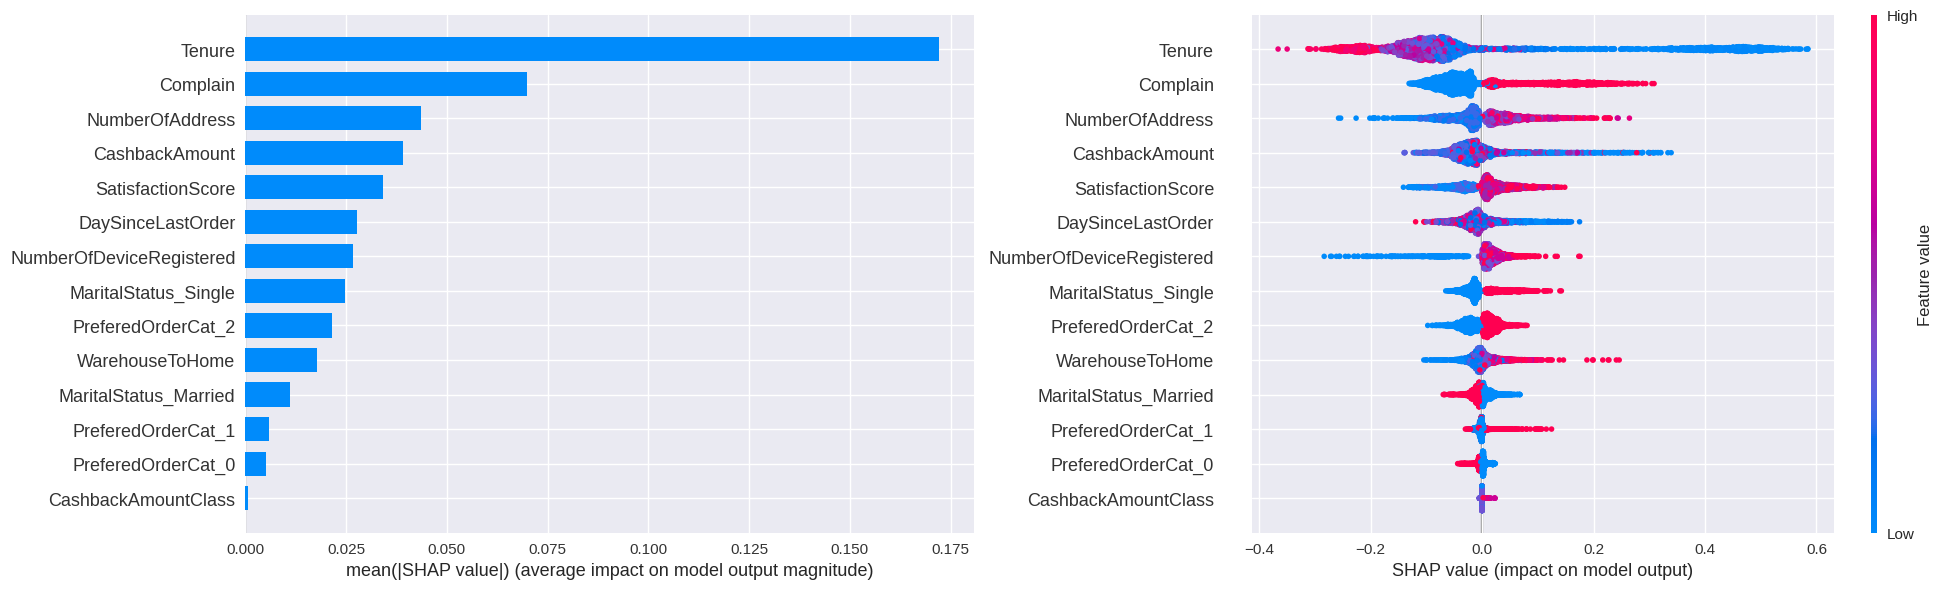

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='Feature Importance', plot_type='bar', show=False, plot_size=None)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, candidate_pre, feature_names = features,  title='SHAP Feature', show=False, plot_size=None)
plt.show()

**Didapatkan Informasi dari SHAP Plot:**
1. `Tenure` menjadi fitur yang paling penting dan berdampak pada customer churn. Semakin kecil `Tenure` artinya  customer baru mendaftarkan diri ke E-Commerce, semakin mungkin customer tersebut untuk churn dan berlaku pula sebaliknya. Hal ini logis karena customer baru belum memiliki brand loyalty.
3. `Complain` juga termasuk fitur yang penting. Jika terdapat complain (angka 1), maka customer lebih berpotensi untuk churn. Hal ini logis karena customer yang komplain kemungkinan besar tidak suka dengan suatu layanan di E-Commerce.
5. Fitur berikutnya yang berpengaruh  adalah `NumberOfAddress`. Semakin tinggi nilai `NumberOfAddress`, maka dapat berdampak pada customer churn. Hal ini belum dapat dijelaskan secara logika, apakah customer banyak berpindah-pindah?


##*7. Conclusion and Recommendation*

### *Conclusion*

Tujuan kita berdasarkan business problem adalah untuk memprediksi kemungkinan seorang customer akan churn (tidak menggunakan e-commerce lagi). Didapatkan informasi dari melihat hasil Light GBM yang telah dilakukan Hyperparameter Tuning diatas:

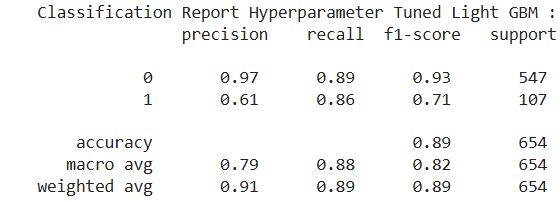

- Melihat metriks recall/sensitivity, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memfilter/menyaring customer yang akan churn dan kita coba tawarkan promo, maka model kita dapat mengurangi 89% customer yang loyal dan tidak perlu diberikan promosi, dan model kita dapat menawarkan promo ke 86% customer yang beneran akan churn.

- Namun demikian, Model kita ini memiliki precision (ketepatan prediksi) customer churn sebesar 61%, jadi setiap model kita memprediksi bahwa seorang customer akan churn, maka kemungkinan tebakannya benar sebesar 61%. Maka masih akan ada customer yang sebenarnya tidak akan churn tetapi diprediksi sebagai customer yang dapat churn 11% dari keseluruhan customer yang tidak churn (juga berdasarkan recall).

Dalam melakukan prediksi, kesalahan yang dapat terjadi yaitu:

**Type 1 error** : False Positive  
Konsekuensi: kerugian perusahaan karena mengeluarkan biaya promo untuk pelanggan yang tidak tepat. Berdasarkan [*firstpagesage*](https://firstpagesage.com/reports/average-cac-for-ecommerce-companies/) dan mengasumsikan E-commerce bergerak dalam bidang Food and Beverage, maka biaya promo sebesar 53 USD per customer.

**Type 2 error** : False Negative  
Konsekuensi: kerugian perusahaan karena customer berhenti/*churn*. Berdasarkan [*forrester*](https://www.forrester.com/what-it-means/ep04-rethinking-customer-loyalty/) dan asumsi biaya promo 53 USD, maka kerugian akibat customer mengalami churn sebesar 265 USD.


Maka secara konteks bisnis dengan 3941 customer (674 customer diantaranya benar menjadi churn)yang ada pada data E-commerce saat ini, dapat dihitung analisis perbandingan jika perusahaan memberikan promo kepada semua pelanggan dan memberikan promo dengan menggunakan hasil model machine learning.

*Konteks satuan kurs mengikuti USD (menggunakan koma untuk ribuan, pembulatan keatas karena jumlah customer tidak bisa koma-komaan)*

-*Tanpa Model* (Semua pelanggan diberikan penawaran):
- Total Biaya => 3941 x 53 USD = 208,873 USD
- Total customer yang churn, dipromosikan => 674 orang
- Total customer yang churn, tidak dipromosikan => 0 orang
- Total customer tidak churn, dipromosikan => **3267 orang**
- Total customer tidak churn, tidak dipromosikan => 0 orang
- Biaya yang terbuang => 3267 x 53 USD = **173,151 USD**

-*Dengan Model* (Promo diberikan sesuai prediksi churn):
- Total Biaya => "[(674 x 0.86) + (3267 x 0.11)]" x 53 USD = 49,820 USD
- Total customer yang churn, dipromosikan => (674 x 0.86) = 580 orang
- Total customer yang churn, tidak dipromosikan => (674 - 580) = 94 orang
- Total customer tidak churn, dipromosikan => (3267 - 2908) = **359 orang**
- Total customer tidak churn, **TIDAK** dipromosikan => (3267 x 0.89)= 2908 orang
- Biaya yang terbuang => (359 x 53 USD) + (94 x 53 USD x 5 kali lipat) = 19,027 + 24,910 = **43,937 USD**
- Jumlah penghematan => 173,151 USD - 43,937 USD = **HEMAT 129,214 USD**

Dengan menggunakan model klasifikasi, perusahan E-commerce dapat menghemat biaya promosi secara signifikan dengan melakukan marketing yang lebih tepat sasaran.


Ditambah, analisa Factor Importance untuk mencari variabel yang berpengaruh dengan customer churn menunjukkan bahwa `Tenure` dan `Complain` berpengaruh signifikan dalam memprediksi churn. Apabila masa tenure customer masih kecil dan customer melakukan complain, potensi customer churn akan tinggi.

### *Recommendation*

Rekomendasi yang dapat diberikan untuk perusahaan E-commerce dari sisi:  
  
* Business:
    - Memberikan promo pada customer dengan masa `Tenure` 0-2 bulan yang paling berpotensi churn. Hal ini dapat berupa promo, cashback, atau subscription untuk membangun brand loyalty bagi customer baru.
    - Menindaklanjuti `Complain` dari customer agar pelanggan merasa mendapatkan service dan produk yang memuaskan.
    - Memberikan penawaran pemotongan ongkos kirim pada potensi customer yang jarak antara warehouse dan rumah cukup jauh.
    - Menggunakan dan mengembangkan model machine learning ini untuk semakin akurat memprediksi churn sebagai solusi untuk menentukan strategi pemasaran yang tepat sasaran.     
    
     
* Model:
    - Mengumpulkan lebih banyak data pada minority class agar tidak imbalance.
    - Database perlu ditambahkan kolom customer ID untuk memastikan tidak ada data yang duplikat, serta pada saat input data perlu dipastikan tidak ada missing value.
    - Database perlu juga dimasukkan kolom fitur lain yang berhubungan langsung dengan transaksi, servis, dan proses bisnis di perusahaan e-commerce. Contohnya tanggal produk dikirim, tanggal produk diterima, rating customer terhadap penyelesaian komplain, dll.
    - Melakukan tuning hyperparameter yang lebih banyak pada model, ataupun juga menambahkan parameter lain dalam tuning.
    - Memberikan bobot lebih detail terhadap metrics evaluation.
    - Melakukan feature selection sesuai dengan hasil feature importances.
